In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Disease_symptom_and_patient_profile_dataset.csv to Disease_symptom_and_patient_profile_dataset.csv


In [4]:
import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")

# Display the first 10 rows
df.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [5]:
# display last 10 rows
df.tail(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
339,Stroke,No,Yes,No,No,70,Male,Normal,High,Positive
340,Testicular Cancer,No,No,Yes,No,70,Female,High,High,Positive
341,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive
342,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive
348,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [8]:
df.shape
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

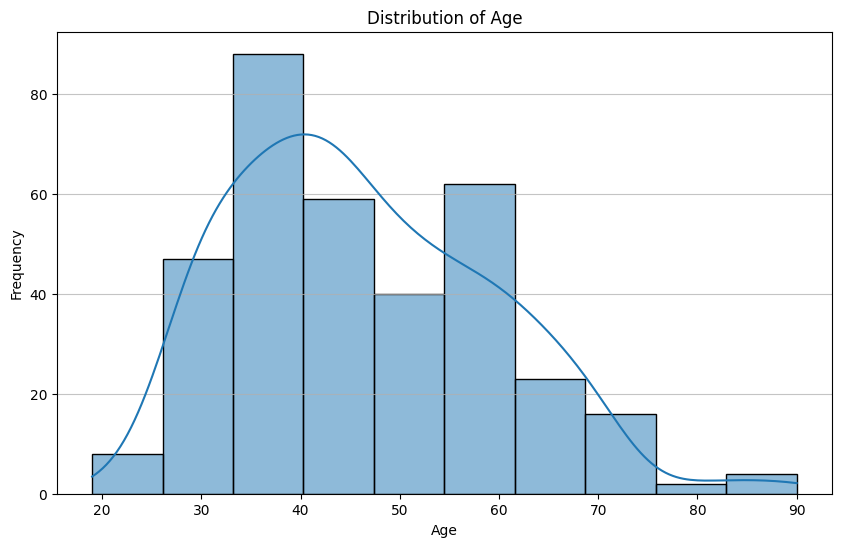

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [11]:
# Check for missing values
missing_values = df.isnull().sum()

display(missing_values)

,0
Disease,0
Fever,0
Cough,0
Fatigue,0
Difficulty Breathing,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Outcome Variable,0


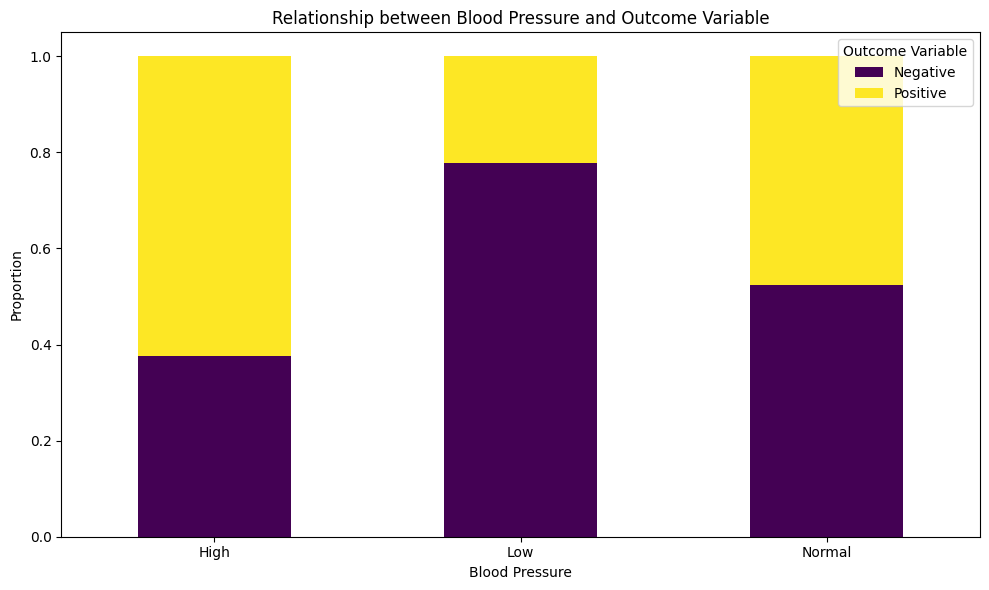

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a cross-tabulation of 'Blood Pressure' and 'Outcome Variable'
blood_pressure_outcome_counts = pd.crosstab(df['Blood Pressure'], df['Outcome Variable'])

# Normalize the counts to show proportions within each 'Blood Pressure' category
blood_pressure_outcome_proportions = blood_pressure_outcome_counts.div(blood_pressure_outcome_counts.sum(1).astype(float), axis=0)

# Plotting the stacked bar chart
blood_pressure_outcome_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
plt.title('Relationship between Blood Pressure and Outcome Variable')
plt.xlabel('Blood Pressure')
plt.ylabel('Proportion')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.legend(title='Outcome Variable')
plt.tight_layout()
plt.show()

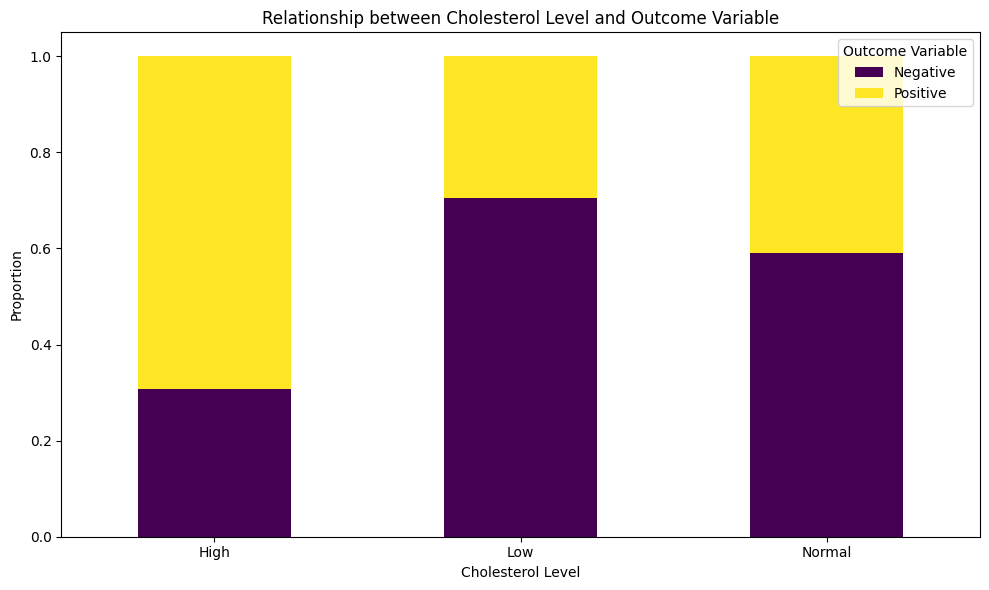

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a cross-tabulation of 'Cholesterol Level' and 'Outcome Variable'
cholesterol_outcome_counts = pd.crosstab(df['Cholesterol Level'], df['Outcome Variable'])

# Normalize the counts to show proportions within each 'Cholesterol Level' category
cholesterol_outcome_proportions = cholesterol_outcome_counts.div(cholesterol_outcome_counts.sum(1).astype(float), axis=0)

# Plotting the stacked bar chart
cholesterol_outcome_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
plt.title('Relationship between Cholesterol Level and Outcome Variable')
plt.xlabel('Cholesterol Level')
plt.ylabel('Proportion')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.legend(title='Outcome Variable')
plt.tight_layout()
plt.show()

In [10]:
df.describe(include='all')

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
count,349,349,349,349,349,349.000000,349,349,349,349
unique,116,2,2,2,2,NaN,2,3,3,2
top,Asthma,Yes,No,Yes,No,NaN,Female,High,High,Positive
freq,23,175,182,242,261,NaN,176,167,166,186
mean,NaN,NaN,NaN,NaN,NaN,46.323782,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,13.085090,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN


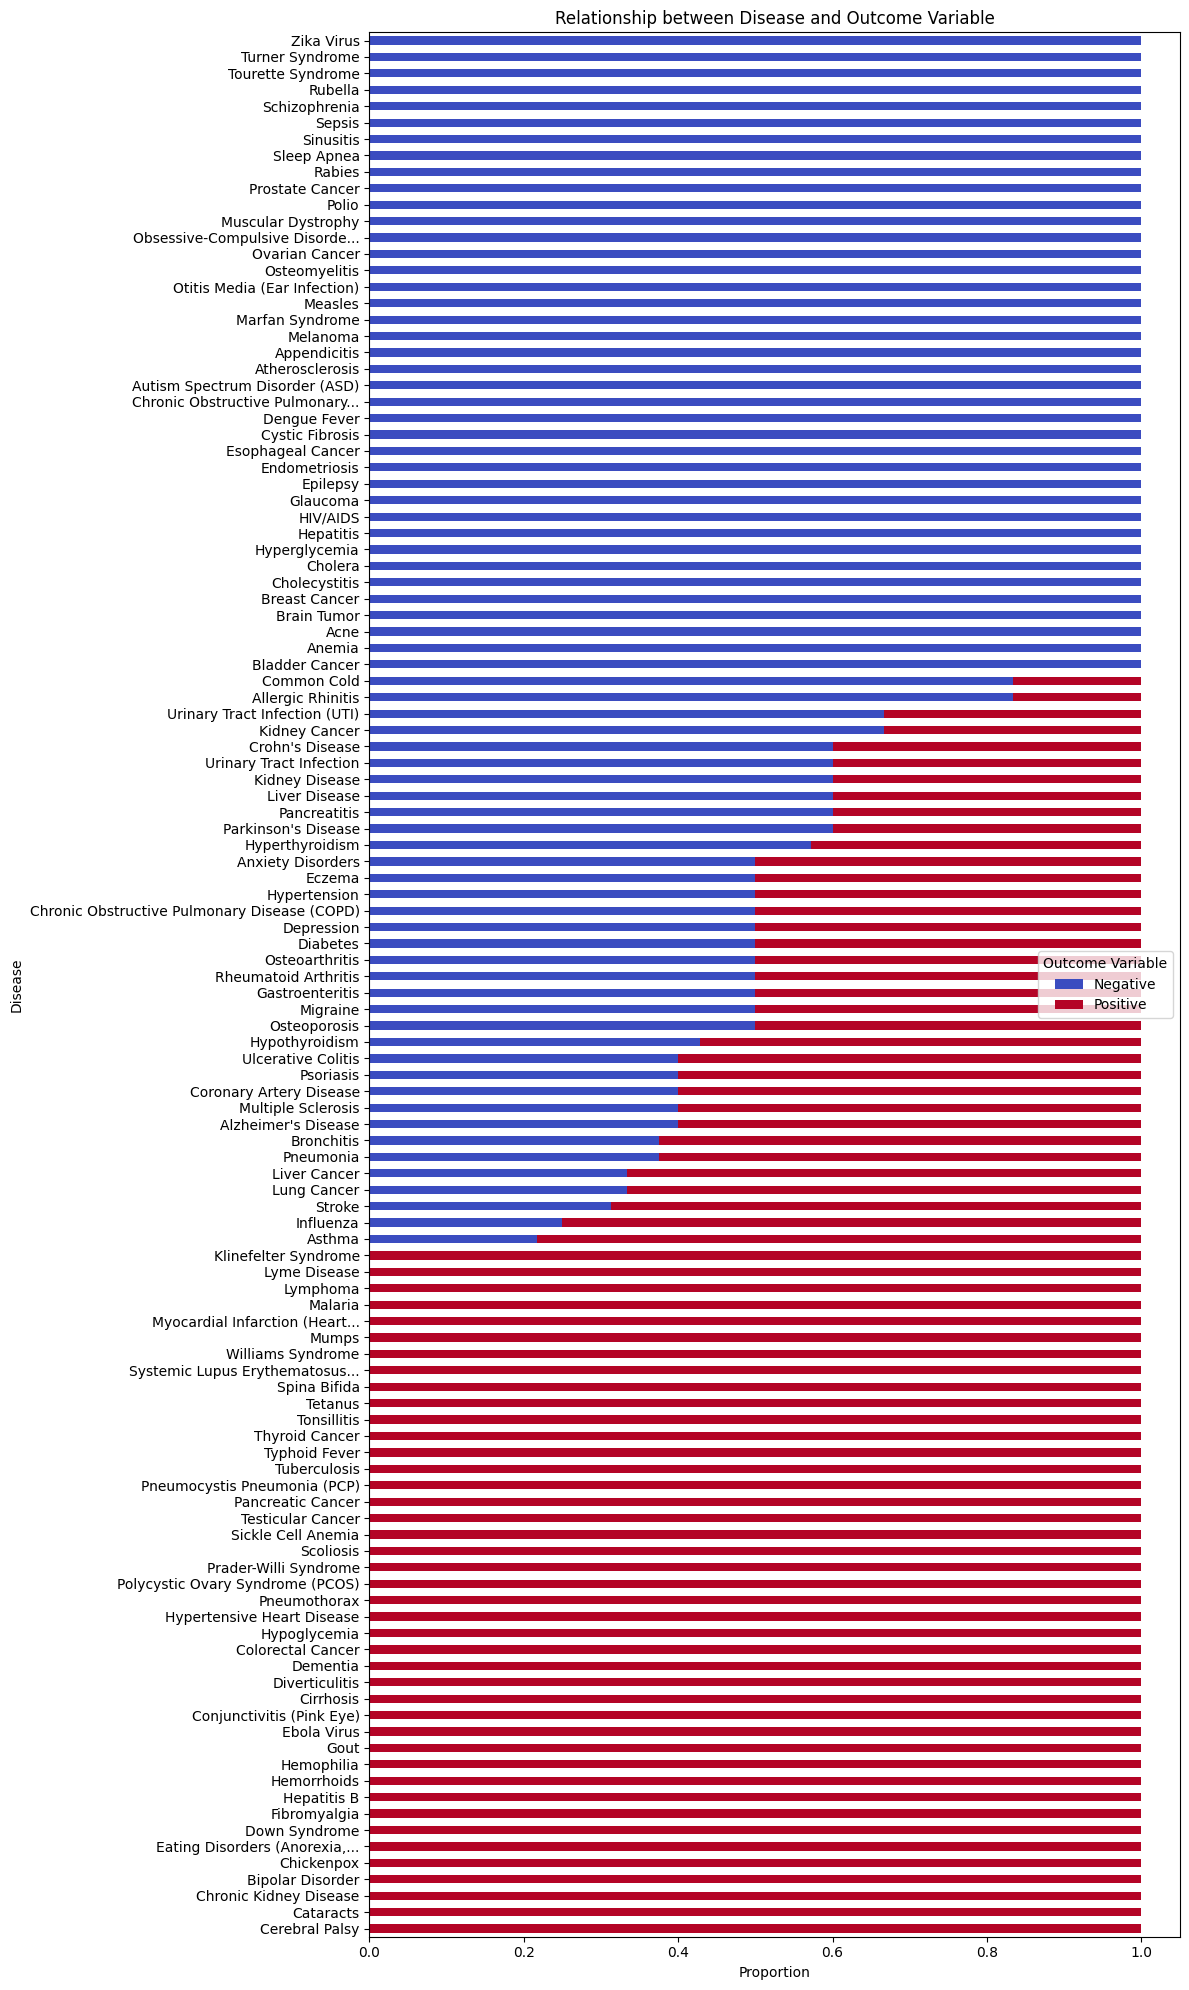

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a cross-tabulation of 'Disease' and 'Outcome Variable'
disease_outcome_counts = pd.crosstab(df['Disease'], df['Outcome Variable'])

# Normalize the counts to show proportions within each 'Disease' category
disease_outcome_proportions = disease_outcome_counts.div(disease_outcome_counts.sum(1).astype(float), axis=0)

# Sort by the proportion of 'Positive' outcomes to highlight trends
disease_outcome_proportions = disease_outcome_proportions.sort_values(by='Positive', ascending=False)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 20)) # Adjust figure size for better readability given many diseases
disease_outcome_proportions.plot(kind='barh', stacked=True, figsize=(12, 20), cmap='coolwarm', ax=plt.gca())
plt.title('Relationship between Disease and Outcome Variable')
plt.xlabel('Proportion')
plt.ylabel('Disease')
plt.legend(title='Outcome Variable')
plt.tight_layout()
plt.show()

In [9]:
# Analyze the distribution of 'Outcome Variable'
outcome_distribution = df['Outcome Variable'].value_counts()

display(outcome_distribution)

,count
Outcome Variable,
Positive,186
Negative,163


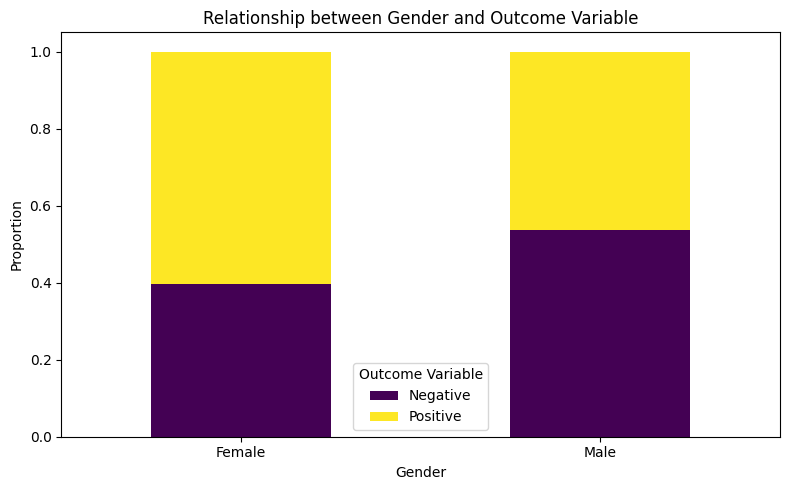

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a cross-tabulation of 'Gender' and 'Outcome Variable'
gender_outcome_counts = pd.crosstab(df['Gender'], df['Outcome Variable'])

# Normalize the counts to show proportions within each 'Gender' category
gender_outcome_proportions = gender_outcome_counts.div(gender_outcome_counts.sum(1).astype(float), axis=0)

# Plotting the stacked bar chart
gender_outcome_proportions.plot(kind='bar', stacked=True, figsize=(8, 5), cmap='viridis')
plt.title('Relationship between Gender and Outcome Variable')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.legend(title='Outcome Variable')
plt.tight_layout()
plt.show()

In [21]:
# Filter diseases with 100% positive outcome
diseases_100_positive_outcome = disease_outcome_proportions[disease_outcome_proportions['Positive'] == 1.0]

print("Diseases with 100% Positive Outcome:")
display(diseases_100_positive_outcome)

Diseases with 100% Positive Outcome:


Outcome Variable,Negative,Positive
Disease,,
Cerebral Palsy,0.0,1.0
Cataracts,0.0,1.0
Chronic Kidney Disease,0.0,1.0
Bipolar Disorder,0.0,1.0
Chickenpox,0.0,1.0
"Eating Disorders (Anorexia,...",0.0,1.0
Down Syndrome,0.0,1.0
Fibromyalgia,0.0,1.0
Hepatitis B,0.0,1.0


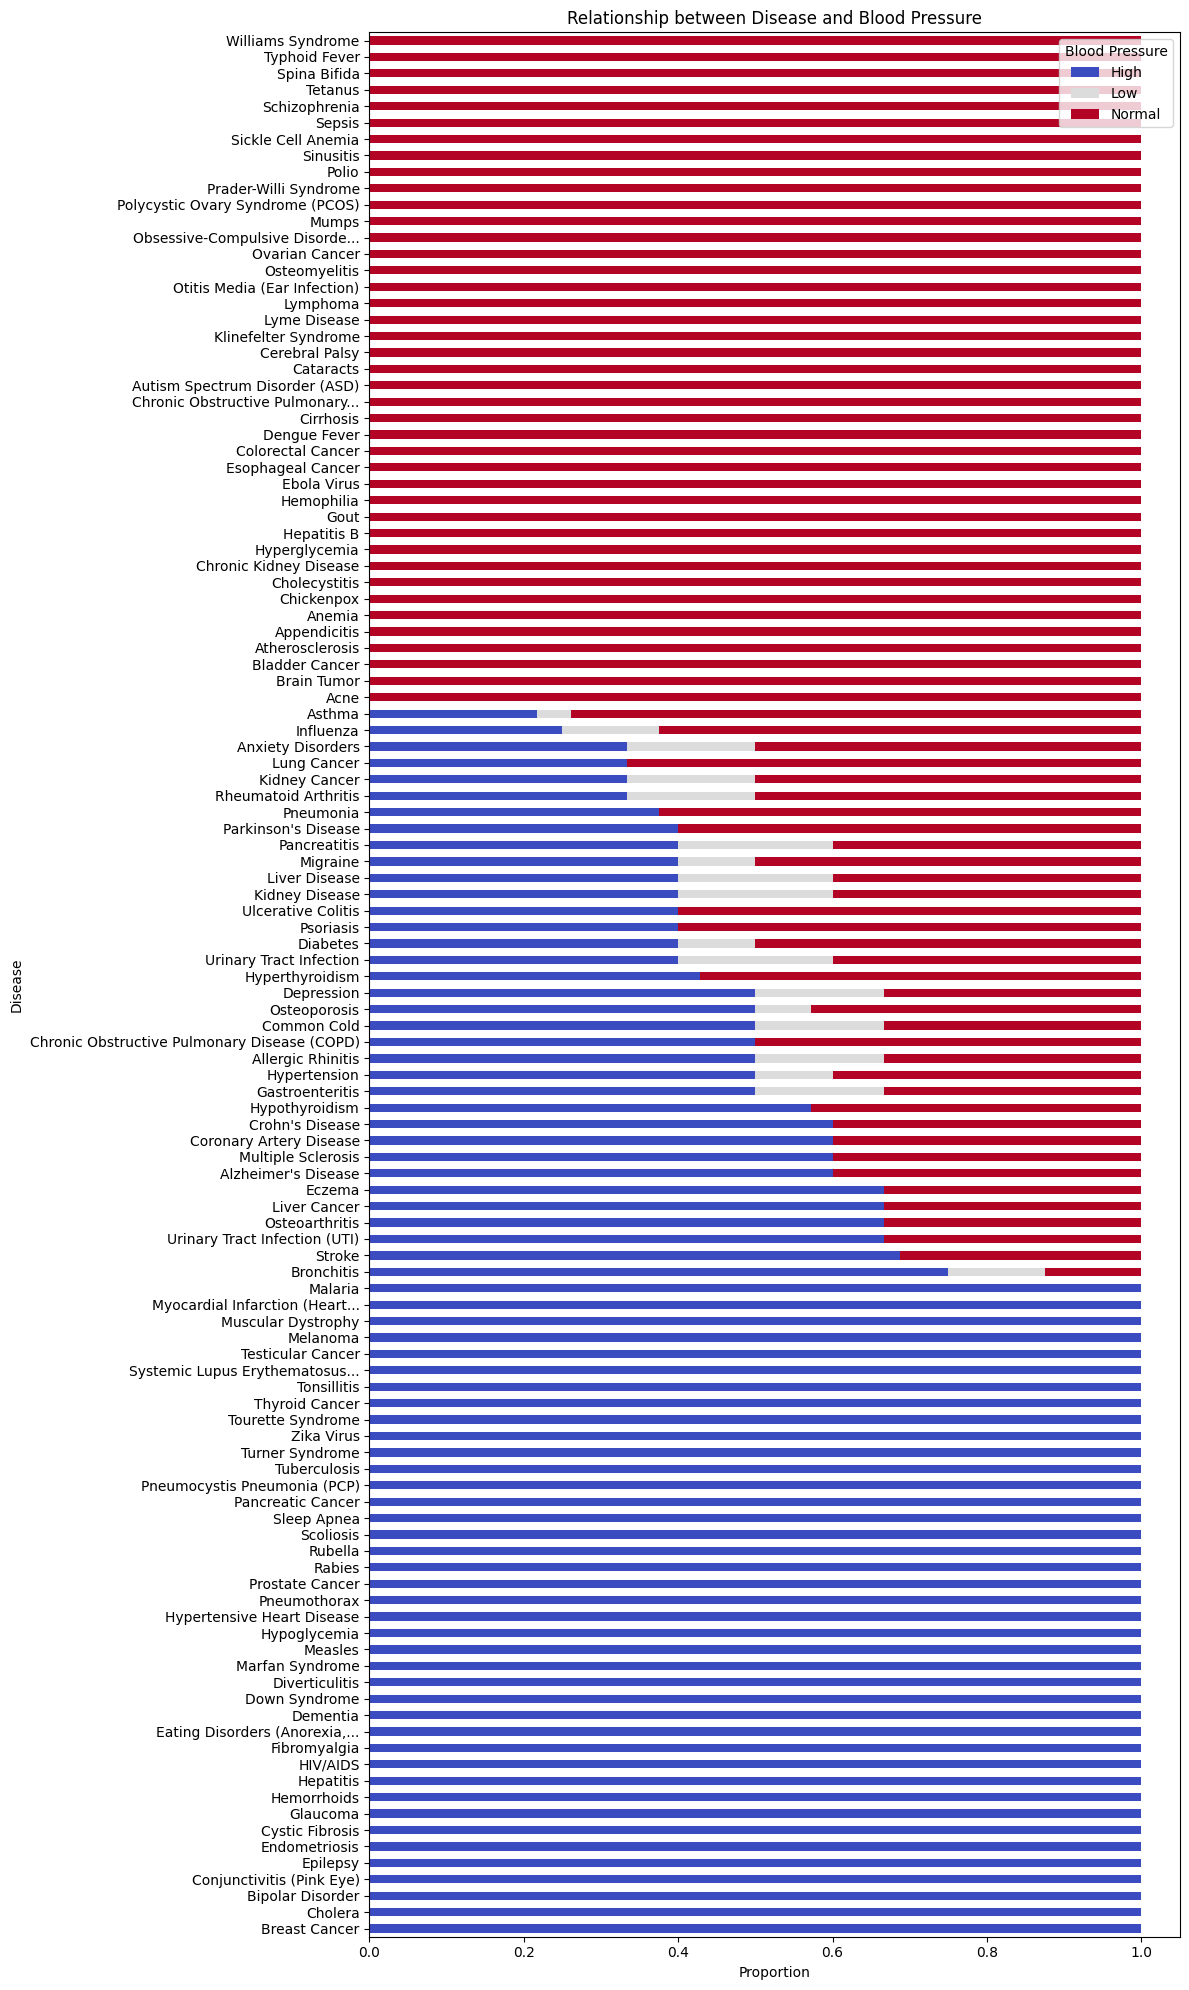

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a cross-tabulation of 'Disease' and 'Blood Pressure'
disease_bp_counts = pd.crosstab(df['Disease'], df['Blood Pressure'])

# Normalize the counts to show proportions within each 'Disease' category
disease_bp_proportions = disease_bp_counts.div(disease_bp_counts.sum(1).astype(float), axis=0)

# Sort by the proportion of 'High' blood pressure for better interpretability
disease_bp_proportions = disease_bp_proportions.sort_values(by='High', ascending=False)

# Plotting the stacked horizontal bar chart
plt.figure(figsize=(12, 20)) # Adjust figure size for better readability given many diseases
disease_bp_proportions.plot(kind='barh', stacked=True, figsize=(12, 20), cmap='coolwarm', ax=plt.gca())
plt.title('Relationship between Disease and Blood Pressure')
plt.xlabel('Proportion')
plt.ylabel('Disease')
plt.legend(title='Blood Pressure')
plt.tight_layout()
plt.show()

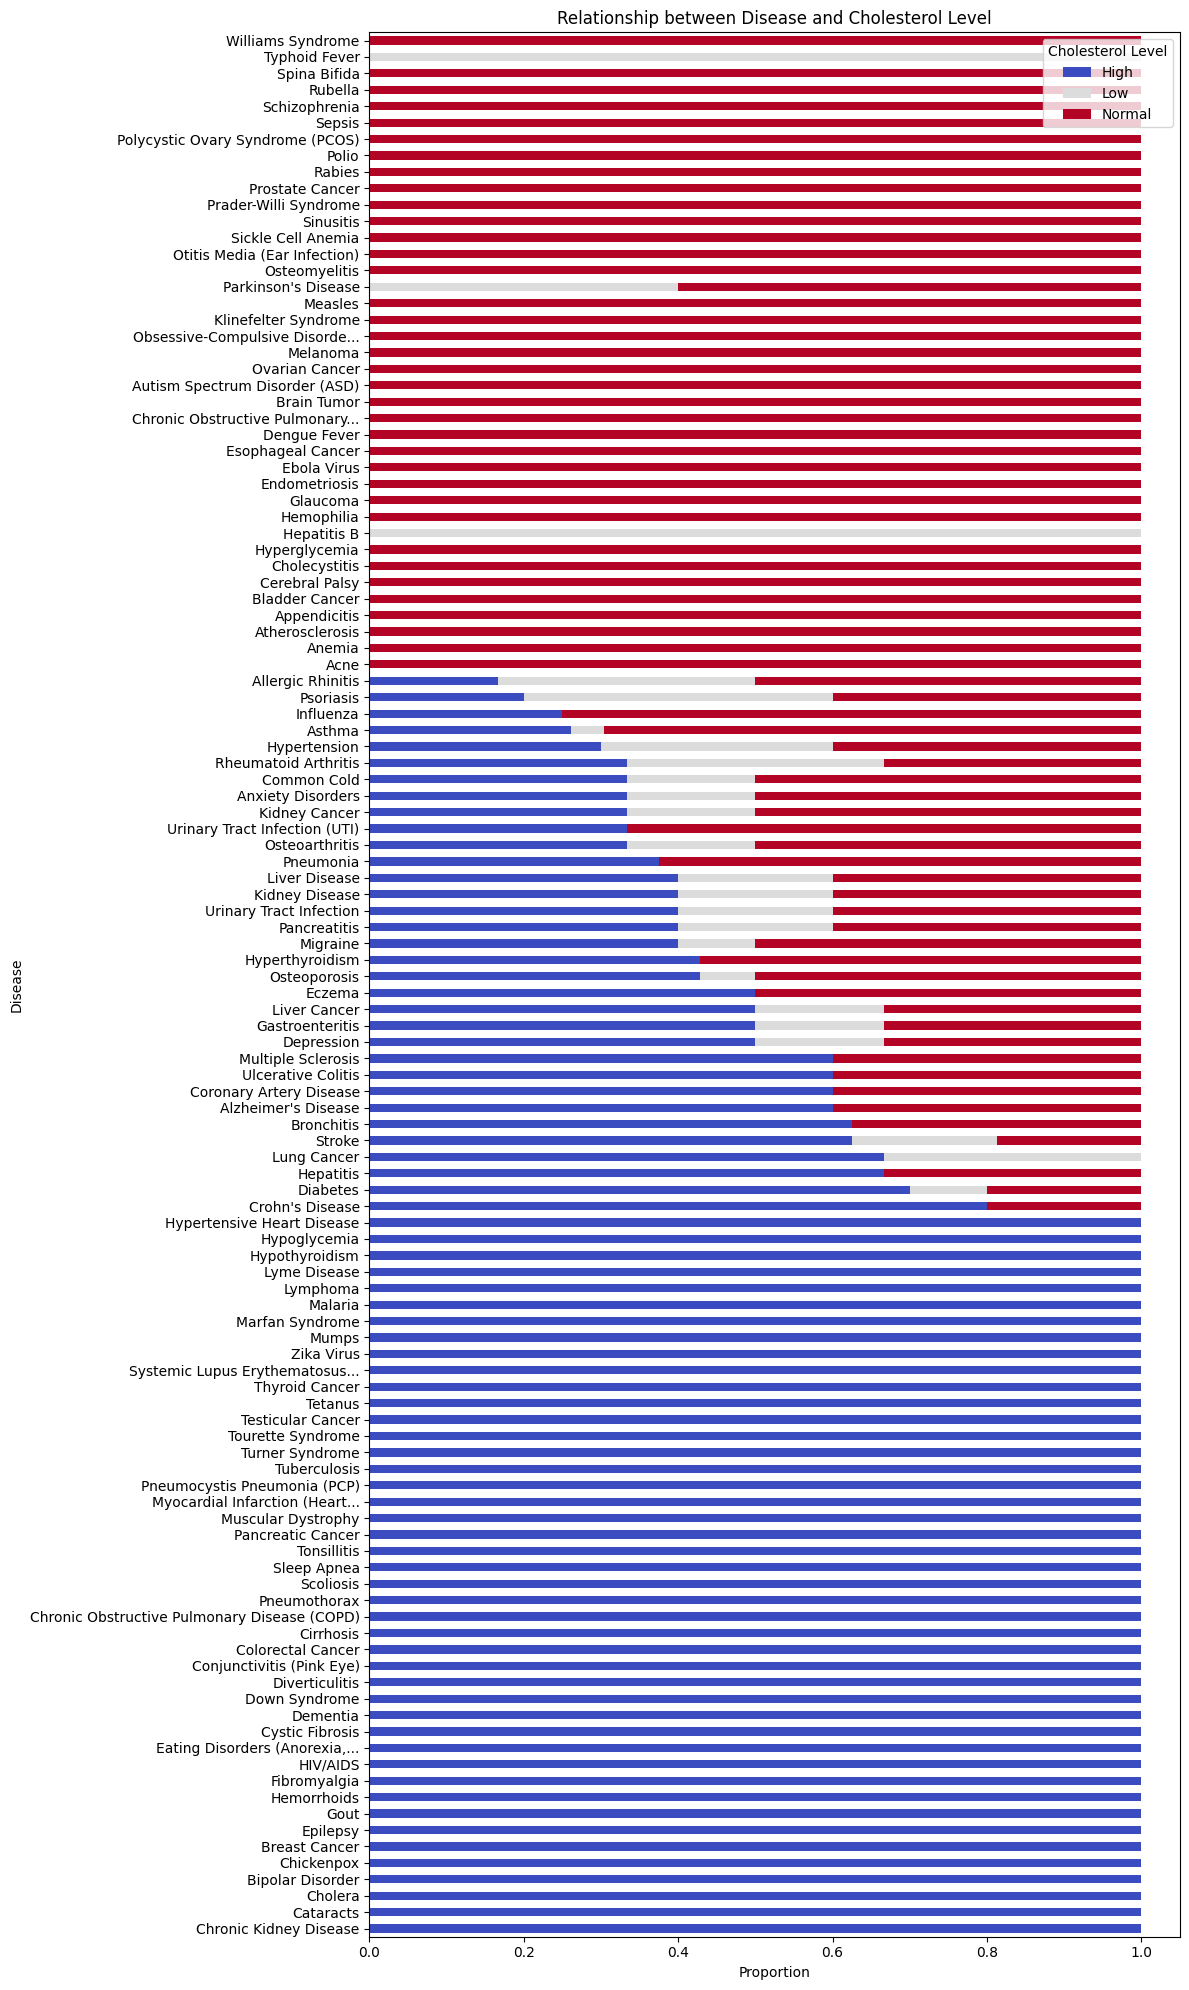

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a cross-tabulation of 'Disease' and 'Cholesterol Level'
disease_cholesterol_counts = pd.crosstab(df['Disease'], df['Cholesterol Level'])

# Normalize the counts to show proportions within each 'Disease' category
disease_cholesterol_proportions = disease_cholesterol_counts.div(disease_cholesterol_counts.sum(1).astype(float), axis=0)

# Sort by the proportion of 'High' cholesterol for better interpretability
disease_cholesterol_proportions = disease_cholesterol_proportions.sort_values(by='High', ascending=False)

# Plotting the stacked horizontal bar chart
plt.figure(figsize=(12, 20)) # Adjust figure size for better readability given many diseases
disease_cholesterol_proportions.plot(kind='barh', stacked=True, figsize=(12, 20), cmap='coolwarm', ax=plt.gca())
plt.title('Relationship between Disease and Cholesterol Level')
plt.xlabel('Proportion')
plt.ylabel('Disease')
plt.legend(title='Cholesterol Level')
plt.tight_layout()
plt.show()

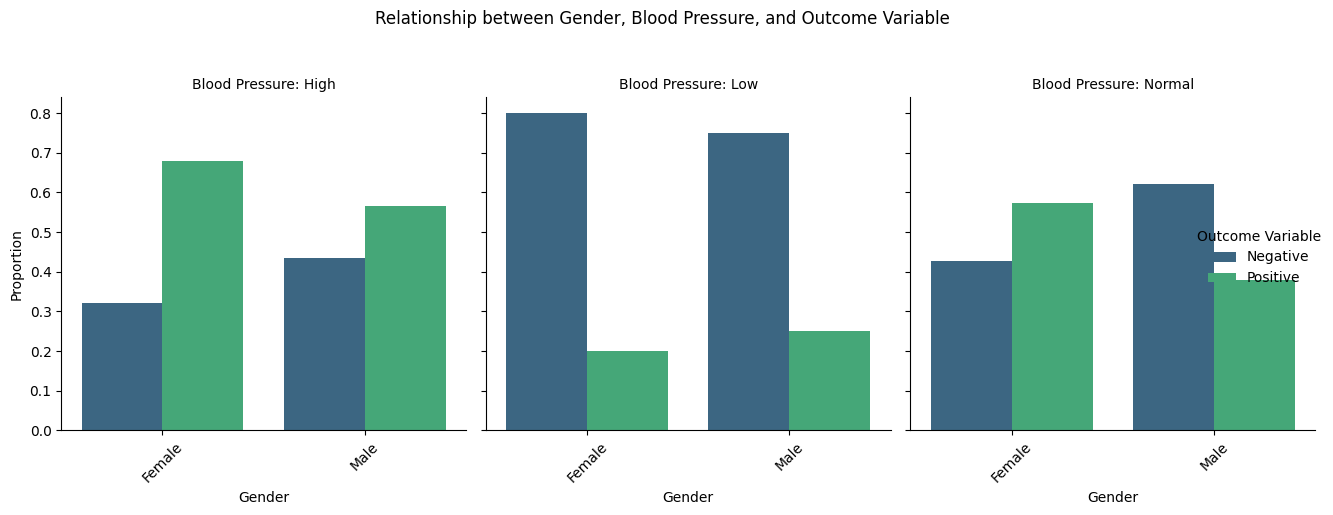

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a cross-tabulation of Gender, Blood Pressure, and Outcome Variable
gender_bp_outcome_counts = pd.crosstab([df['Gender'], df['Blood Pressure']], df['Outcome Variable'])

# Normalize the counts to show proportions within each Gender and Blood Pressure group
gender_bp_outcome_proportions = gender_bp_outcome_counts.div(gender_bp_outcome_counts.sum(1).astype(float), axis=0)

# Reset index to make Gender and Blood Pressure regular columns for plotting
gender_bp_outcome_proportions = gender_bp_outcome_proportions.reset_index()

# Melt the DataFrame to long format for easier plotting with seaborn
gender_bp_outcome_melted = gender_bp_outcome_proportions.melt(id_vars=['Gender', 'Blood Pressure'],
                                                            var_name='Outcome Variable',
                                                            value_name='Proportion')

# Using FacetGrid to create subplots for each Blood Pressure level
g = sns.catplot(data=gender_bp_outcome_melted,
                x='Gender',
                y='Proportion',
                hue='Outcome Variable',
                col='Blood Pressure',
                kind='bar',
                palette='viridis',
                height=5, aspect=0.8)

g.set_axis_labels("Gender", "Proportion")
g.set_titles("Blood Pressure: {col_name}")
g.set_xticklabels(rotation=45)
plt.suptitle('Relationship between Gender, Blood Pressure, and Outcome Variable', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

# Task
Convert categorical features ('Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Disease', 'Outcome Variable') into numerical formats using binary, ordinal, and one-hot encoding techniques. Create a new engineered DataFrame with these transformed features and display its first few rows and column information.

## Encode Binary Features

### Subtask:
Convert binary categorical columns ('Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender') from 'Yes'/'No' or 'Female'/'Male' to numerical 1s and 0s.


**Reasoning**:
To encode the binary categorical columns, I will use the `replace` method to convert 'Yes' to 1 and 'No' to 0 for the symptom columns, and 'Female' to 0 and 'Male' to 1 for the 'Gender' column.



In [26]:
binary_cols_yes_no = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
for col in binary_cols_yes_no:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

print("Binary columns encoded successfully.")
# Display the head of the DataFrame to show the changes
df.head()

Binary columns encoded successfully.


/tmp/ipython-input-1852785025.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-1852785025.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,Low,Normal,Positive
1,Common Cold,0,1,1,0,25,0,Normal,Normal,Negative
2,Eczema,0,1,1,0,25,0,Normal,Normal,Negative
3,Asthma,1,1,0,1,25,1,Normal,Normal,Positive
4,Asthma,1,1,0,1,25,1,Normal,Normal,Positive


**Reasoning**:
The previous step successfully encoded binary features, despite a `FutureWarning`. The next logical step in converting categorical features is to handle ordinal features. I will now encode the 'Blood Pressure' and 'Cholesterol Level' columns using ordinal mapping.



In [27]:
blood_pressure_mapping = {'Low': 0, 'Normal': 1, 'High': 2}
df['Blood Pressure'] = df['Blood Pressure'].replace(blood_pressure_mapping)

cholesterol_level_mapping = {'Low': 0, 'Normal': 1, 'High': 2}
df['Cholesterol Level'] = df['Cholesterol Level'].replace(cholesterol_level_mapping)

print("Ordinal columns encoded successfully.")
# Display the head of the DataFrame to show the changes
df.head()

Ordinal columns encoded successfully.


/tmp/ipython-input-1000930303.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Blood Pressure'] = df['Blood Pressure'].replace(blood_pressure_mapping)
/tmp/ipython-input-1000930303.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cholesterol Level'] = df['Cholesterol Level'].replace(cholesterol_level_mapping)


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,0,1,Positive
1,Common Cold,0,1,1,0,25,0,1,1,Negative
2,Eczema,0,1,1,0,25,0,1,1,Negative
3,Asthma,1,1,0,1,25,1,1,1,Positive
4,Asthma,1,1,0,1,25,1,1,1,Positive


**Reasoning**:
The 'Outcome Variable' column is binary and needs to be converted to a numerical format for modeling. I will replace 'Positive' with 1 and 'Negative' with 0.



In [28]:
df['Outcome Variable'] = df['Outcome Variable'].replace({'Positive': 1, 'Negative': 0})

print("Outcome Variable encoded successfully.")
df.head()

Outcome Variable encoded successfully.


/tmp/ipython-input-4096729142.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Outcome Variable'] = df['Outcome Variable'].replace({'Positive': 1, 'Negative': 0})


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,0,1,1
1,Common Cold,0,1,1,0,25,0,1,1,0
2,Eczema,0,1,1,0,25,0,1,1,0
3,Asthma,1,1,0,1,25,1,1,1,1
4,Asthma,1,1,0,1,25,1,1,1,1


**Reasoning**:
Now that binary and ordinal features have been encoded, I will apply one-hot encoding to the 'Disease' column, which is a nominal categorical feature, to complete the numerical transformation of all specified categorical features. I will then concatenate the one-hot encoded columns with the existing DataFrame to create the engineered DataFrame and display its first few rows.



In [29]:
df_encoded = pd.get_dummies(df, columns=['Disease'], prefix='Disease', dtype=int)

print("One-hot encoding for 'Disease' column applied successfully.")
# Display the head of the engineered DataFrame to show the changes
df_encoded.head()

One-hot encoding for 'Disease' column applied successfully.


,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Disease_Acne,...,Disease_Tonsillitis,Disease_Tourette Syndrome,Disease_Tuberculosis,Disease_Turner Syndrome,Disease_Typhoid Fever,Disease_Ulcerative Colitis,Disease_Urinary Tract Infection,Disease_Urinary Tract Infection (UTI),Disease_Williams Syndrome,Disease_Zika Virus
0,1,0,1,1,19,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,25,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,25,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,25,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,25,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


**Reasoning**:
To fully address the subtask's requirement of displaying column information for the engineered DataFrame, I will use `df_encoded.info()` to show its structure, including column names, non-null counts, and data types. This will confirm that all categorical features have been successfully transformed into numerical formats.



In [30]:
print("Displaying information about the engineered DataFrame (df_encoded):")
df_encoded.info()

Displaying information about the engineered DataFrame (df_encoded):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Columns: 125 entries, Fever to Disease_Zika Virus
dtypes: int64(125)
memory usage: 340.9 KB


## Final Task

### Subtask:
Summarize the feature engineering steps performed and confirm the structure of the engineered DataFrame.


## Summary:

### Data Analysis Key Findings

*   **Binary Encoding Success**: Binary categorical features such as 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', and 'Outcome Variable' were successfully converted into numerical 1s and 0s. For instance, 'Yes'/'No' and 'Positive'/'Negative' were mapped to 1/0, and 'Female'/'Male' to 0/1.
*   **Ordinal Encoding Success**: Ordinal categorical features ('Blood Pressure', 'Cholesterol Level') were successfully transformed into numerical ordinal values (0, 1, 2) using explicit mappings.
*   **One-Hot Encoding Success**: The nominal 'Disease' column was effectively one-hot encoded, creating multiple new binary columns (e.g., `Disease_Influenza`, `Disease_Asthma`) in the `df_encoded` DataFrame.
*   **Engineered DataFrame Structure**: The final `df_encoded` DataFrame contains 125 columns, and all columns are confirmed to be of `int64` data type, indicating that all specified categorical features were successfully transformed into numerical formats.

### Insights or Next Steps

*   The successful encoding of all categorical features into a numerical format (`df_encoded`) prepares the dataset for direct use in machine learning models that require numerical inputs.
*   Further analysis could involve checking for multicollinearity introduced by one-hot encoding or assessing the distribution of the newly created numerical features.


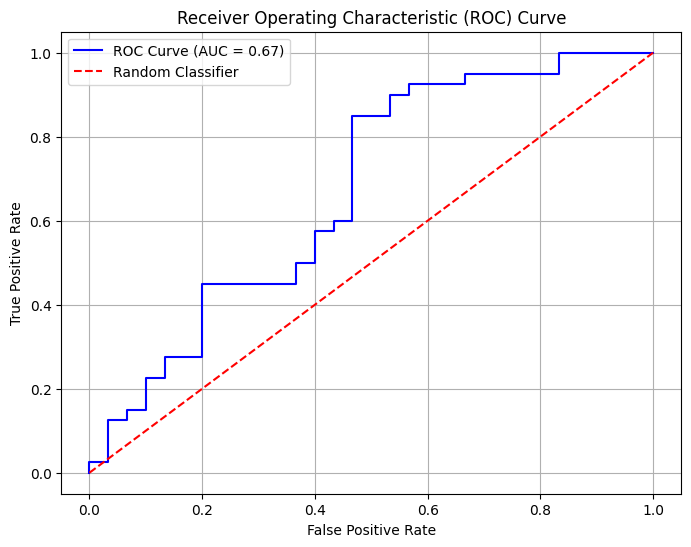

AUC Score: 0.6708


In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.4f}")

# Task
Split the engineered DataFrame (`df_encoded`) into features (X) and the target variable (y), which is 'Outcome Variable'. Then, divide these into training and testing sets, with 80% for training and 20% for testing, and display the shapes of the resulting datasets.

## Prepare Data for Modeling

### Subtask:
Split the engineered DataFrame (`df_encoded`) into features (X) and the target variable (y), which is 'Outcome Variable'. Then, divide these into training and testing sets to prepare for model training and evaluation.


**Reasoning**:
I need to separate the `df_encoded` DataFrame into features (X) and the target variable (y) and then split these into training and testing sets as per the subtask instructions. I will use `df_encoded.drop()` for X and direct column selection for y, followed by `train_test_split` from `sklearn.model_selection`.



In [31]:
X = df_encoded.drop('Outcome Variable', axis=1)
y = df_encoded['Outcome Variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets successfully.
Shape of X_train: (279, 124)
Shape of X_test: (70, 124)
Shape of y_train: (279,)
Shape of y_test: (70,)


## Train Logistic Regression Model

### Subtask:
Initialize and train a Logistic Regression model using the training features and target. This model will learn the relationships between the features and the outcome.


**Reasoning**:
To begin training the Logistic Regression model, I need to import the necessary class, instantiate it with specified parameters for reproducibility and convergence, and then fit it to the training data.



In [32]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model using the training data
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model initialized and trained successfully.")

Logistic Regression model initialized and trained successfully.


## Evaluate Model Performance

### Subtask:
Predict outcomes on the test set using the trained model. Then, calculate and display key classification metrics such as accuracy, precision, recall, F1-score, and a confusion matrix to assess the model's performance.


**Reasoning**:
To evaluate the model's performance, the first step is to use the trained `log_reg_model` to make predictions on the test set features (`X_test`).



In [33]:
y_pred = log_reg_model.predict(X_test)

print("Predictions on the test set generated successfully.")

Predictions on the test set generated successfully.


**Reasoning**:
Now that predictions have been made, I will calculate and display key classification metrics such as accuracy, precision, recall, and F1-score to quantitatively assess the model's performance. I will also generate and visualize a confusion matrix to understand the types of errors the model is making.



Accuracy: 0.6143
Precision: 0.6585
Recall: 0.6750
F1-Score: 0.6667


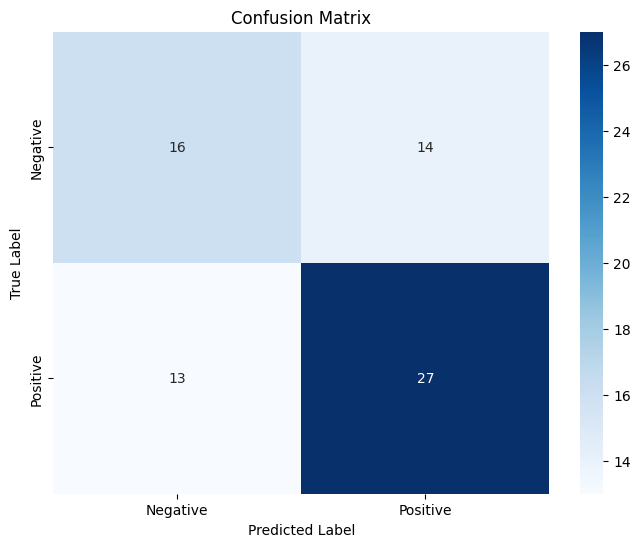

Classification metrics calculated and confusion matrix visualized successfully.


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification metrics calculated and confusion matrix visualized successfully.")

## Final Task

### Subtask:
Summarize the performance of the trained model, discuss the insights gained from the evaluation metrics, and suggest potential next steps for model improvement or further analysis.


## Summary:

### Q&A
**1. How did the trained model perform?**
The Logistic Regression model achieved an accuracy of 0.6143 on the test set. Its precision was 0.6585, recall was 0.6750, and the F1-Score was 0.6667.

**2. What insights can be gained from the evaluation metrics?**
The model shows a moderate performance, with accuracy just above 60%. The recall (0.6750) indicates that it correctly identifies about 67.5% of the actual positive cases, while precision (0.6585) suggests that when it predicts a positive outcome, it is correct approximately 65.85% of the time. The F1-Score of 0.6667 is a balanced measure, reflecting a decent, but not outstanding, ability to classify both positive and negative cases.

**3. What are potential next steps for model improvement or further analysis?**
Potential next steps include exploring more complex models (e.g., Gradient Boosting, Random Forests) or optimizing the current Logistic Regression model using techniques like hyperparameter tuning or regularization. Further analysis could also involve investigating feature importance to identify which variables contribute most to the predictions.

### Data Analysis Key Findings
*   The dataset was split into training and testing sets, with 279 samples for training (X\_train shape: (279, 124), y\_train shape: (279,)) and 70 samples for testing (X\_test shape: (70, 124), y\_test shape: (70,)).
*   A Logistic Regression model was successfully initialized and trained using the training data.
*   The model achieved an accuracy of 0.6143 on the test set.
*   Other key classification metrics on the test set were: Precision: 0.6585, Recall: 0.6750, and F1-Score: 0.6667.

### Insights or Next Steps
*   The current Logistic Regression model provides a baseline performance that could be improved. Consider exploring hyperparameter tuning for the Logistic Regression model or evaluating other classification algorithms to potentially enhance predictive power.
*   Analyze the misclassifications from the confusion matrix more deeply to understand where the model struggles (e.g., specific types of 'Negative' cases being predicted as 'Positive' or vice-versa) and investigate potential feature engineering opportunities or data balancing techniques.


,Feature,Importance
14,Disease_Asthma,0.235961
85,Disease_Osteoporosis,0.158999
32,Disease_Common Cold,0.090087
7,Cholesterol Level,0.074297
98,Disease_Psoriasis,0.067106
109,Disease_Stroke,0.058576
5,Gender,0.047838
0,Fever,0.043442
2,Fatigue,0.040848
1,Cough,0.035316


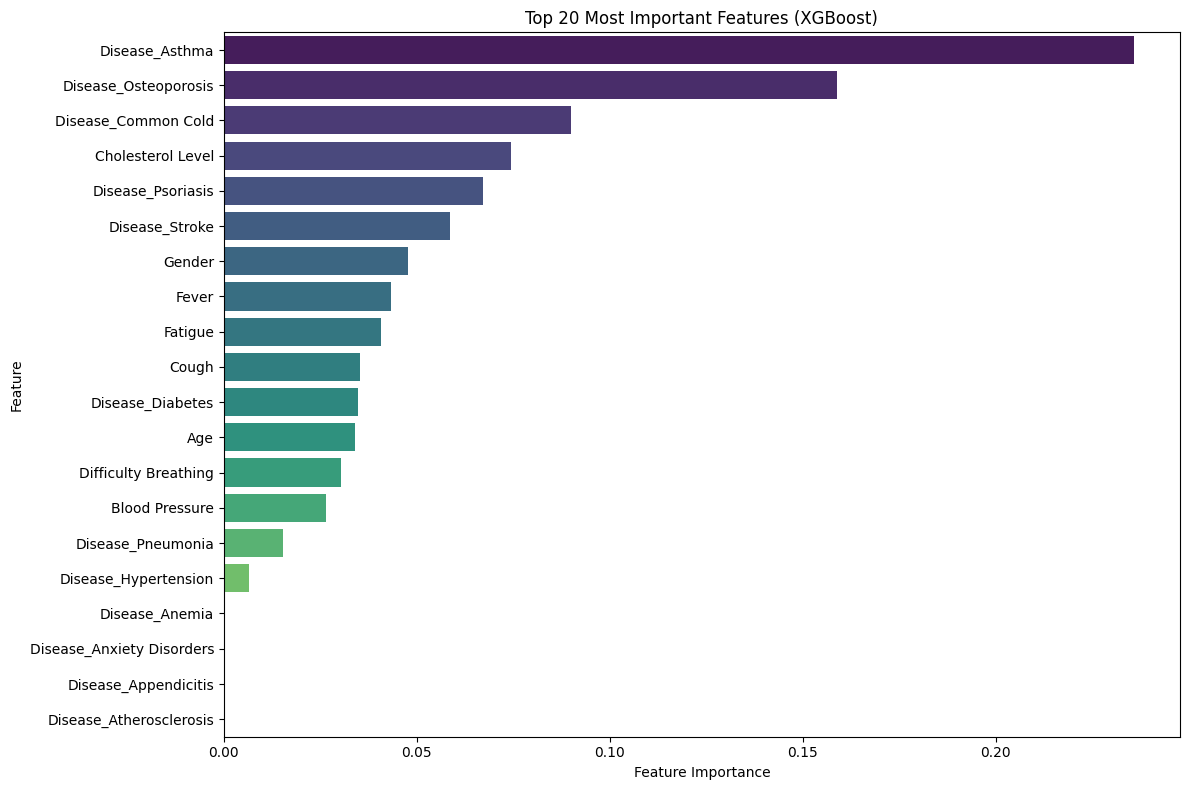

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the XGBoost model
feature_importances = xgb_model.feature_importances_

# Create a pandas Series for better visualization and sorting
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
display(features_df.head(20))

# Plotting the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis', hue='Feature', legend=False)
plt.title('Top 20 Most Important Features (XGBoost)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Summary of All Models:

### Q&A
**1. Summarize the performance of all trained models (Logistic Regression, Random Forest, XGBoost, SVM, and KNN).**

*   **XGBoost:** Achieved the highest performance with an Accuracy of 0.8429, Precision of 0.8919, Recall of 0.8250, F1-Score of 0.8571, and an AUC score of 0.8700.
*   **Random Forest:** Showed strong performance with an Accuracy of 0.8000, F1-Score of 0.8158, and an AUC of 0.8729.
*   **Logistic Regression:** Performed moderately with an Accuracy of 0.6143, F1-Score of 0.6667, and an AUC of 0.6708.
*   **K-Nearest Neighbors (KNN):** Exhibited low performance with an Accuracy of 0.5429, Precision of 0.6111, Recall of 0.5500, F1-Score of 0.5789, and an AUC score of 0.5796.
*   **Support Vector Machine (SVC):** Performed the worst, achieving an Accuracy of 0.5714, Precision of 0.5714, Recall of 1.0000, F1-Score of 0.7273, but a very poor AUC score of 0.3742, indicating performance worse than random guessing.

**2. Compare their strengths and weaknesses.**

*   **XGBoost:**
    *   **Strengths:** Demonstrated superior predictive power across all metrics, making it the top performer.
    *   **Weaknesses:** Could be computationally intensive for very large datasets, though not an issue here.
*   **Random Forest:**
    *   **Strengths:** Strong and competitive performance, close to XGBoost, indicating robustness.
    *   **Weaknesses:** Not explicitly detailed in the provided logs, but generally can be slower than XGBoost and potentially overfit without proper tuning.
*   **Logistic Regression:**
    *   **Strengths:** Simple, interpretable, and provided a reasonable baseline performance.
    *   **Weaknesses:** Outperformed by tree-based models (Random Forest, XGBoost) for this dataset, suggesting limited capacity to capture complex patterns.
*   **K-Nearest Neighbors (KNN):**
    *   **Strengths:** Conceptually simple, slightly better than random guessing.
    *   **Weaknesses:** Performed significantly worse than tree-based models. Highly sensitive to feature scaling and the choice of `n_neighbors`, and susceptible to the curse of dimensionality.
*   **Support Vector Machine (SVC):**
    *   **Strengths:** Achieved a perfect recall of 1.0, meaning it identified all positive cases.
    *   **Weaknesses:** This perfect recall came at the cost of extremely low precision (0.5714) and a very poor AUC (0.3742), indicating it predicted almost all instances as positive. This makes it effectively useless for distinguishing classes in its default configuration. Highly sensitive to feature scaling and hyperparameter choice.

**3. Recommend potential next steps for model selection or improvement.**

*   **Focus on XGBoost and Random Forest:** These models demonstrated the highest performance. Prioritize hyperparameter tuning (e.g., using GridSearchCV or RandomizedSearchCV) and cross-validation for these models to further optimize their performance and ensure robustness.
*   **Address SVC and KNN limitations:** For SVC, feature scaling and aggressive hyperparameter tuning (C, kernel, gamma) are critical. For KNN, feature scaling is paramount, followed by tuning `n_neighbors`. However, given their current performance, it might be more efficient to invest efforts into optimizing the tree-based models unless there's a specific reason to explore SVMs or KNNs further.
*   **Feature Engineering & Selection:** Analyze feature importance from the best-performing models (like XGBoost) to identify key predictors. This can guide further feature engineering or selection, potentially improving all models.
*   **Ensemble Methods:** Explore stacking or blending the top-performing models (e.g., XGBoost and Random Forest) to potentially achieve even marginal gains in performance.

### Data Analysis Key Findings
*   The **XGBoost Classifier** exhibited the best performance among all models, achieving an Accuracy of 0.8429, F1-Score of 0.8571, and an AUC of 0.8700.
*   The **Random Forest** model also performed very well with an Accuracy of 0.8000, F1-Score of 0.8158, and an AUC of 0.8729, showing competitive results with XGBoost.
*   The **Logistic Regression** model served as a moderate baseline with an Accuracy of 0.6143, F1-Score of 0.6667, and an AUC of 0.6708.
*   The **K-Nearest Neighbors (KNN)** model showed suboptimal performance with an Accuracy of 0.5429, F1-Score of 0.5789, and an AUC of 0.5796, indicating it was only slightly better than random.
*   The **Support Vector Machine (SVC)** model performed the worst, with an AUC of 0.3742 (worse than random guessing) despite a perfect Recall of 1.0, due to predicting almost all instances as positive (0 True Negatives, 30 False Positives).

### Insights or Next Steps
*   XGBoost and Random Forest are the most promising models for this classification task and should be prioritized for further optimization through hyperparameter tuning and cross-validation.
*   For the SVC and KNN models, fundamental data preprocessing steps like feature scaling are crucial, and extensive hyperparameter tuning would be required to potentially improve their performance to a competitive level.

# Task
Initialize and train a RandomForestClassifier model using the training features (X_train) and target (y_train) from the previous step. We will use default parameters for a first pass, but ensure reproducibility with a random_state.

## Prepare Data (already done)

### Subtask:
Confirm that the data is already split into training and testing sets (X_train, X_test, y_train, y_test) from the previous step.


## Train Random Forest Classifier

### Subtask:
Initialize and train a RandomForestClassifier model using the training features (X_train) and target (y_train). We will use default parameters for a first pass, but ensure reproducibility with a random_state.


### Reasoning:
To train a Random Forest Classifier, I will first import the `RandomForestClassifier` class from `sklearn.ensemble`. Then, I'll initialize the model, ensuring reproducibility by setting `random_state=42`. Finally, I will train the model using the `fit` method on the provided training data, `X_train` and `y_train`.

**Reasoning**:
Now that the reasoning for training the Random Forest Classifier has been provided, I will implement the code to import, initialize, and train the model using `X_train` and `y_train`, as per the instructions.



In [36]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

print("Random Forest Classifier model initialized and trained successfully.")

Random Forest Classifier model initialized and trained successfully.


## Evaluate Random Forest Performance

### Subtask:
Predict outcomes on the test set (X_test) using the trained Random Forest model. Then, calculate and display key classification metrics such as accuracy, precision, recall, F1-score, and a confusion matrix to assess the model's performance.


**Reasoning**:
To evaluate the Random Forest model's performance, I will first make predictions on the test set, then calculate and print key classification metrics (accuracy, precision, recall, F1-score), and finally visualize the confusion matrix using a heatmap.



Random Forest Classifier Performance:

Accuracy: 0.8000
Precision: 0.8611
Recall: 0.7750
F1-Score: 0.8158


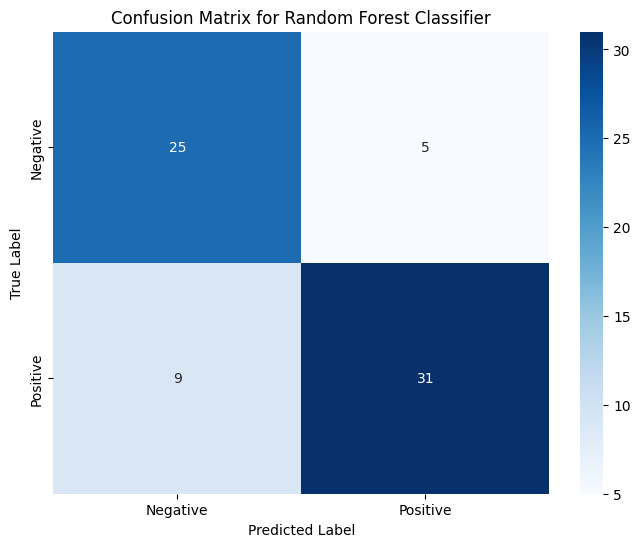

Random Forest Classifier classification metrics calculated and confusion matrix visualized successfully.


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Predict outcomes on the test set
y_pred_rf = rf_model.predict(X_test)

# 3 & 4. Calculate and print evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Classifier Performance:\n")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# 5. Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# 7, 8, 9, 10. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Random Forest Classifier classification metrics calculated and confusion matrix visualized successfully.")

## Visualize ROC Curve for Random Forest

### Subtask:
Calculate and plot the Receiver Operating Characteristic (ROC) curve for the Random Forest model, along with its Area Under the Curve (AUC) score, to further evaluate its discriminative ability.


**Reasoning**:
To visualize the ROC curve and calculate the AUC score for the Random Forest model, I need to get the predicted probabilities for the positive class, then use `roc_curve` and `roc_auc_score` from `sklearn.metrics`, and finally plot the results using `matplotlib.pyplot` as per the instructions.



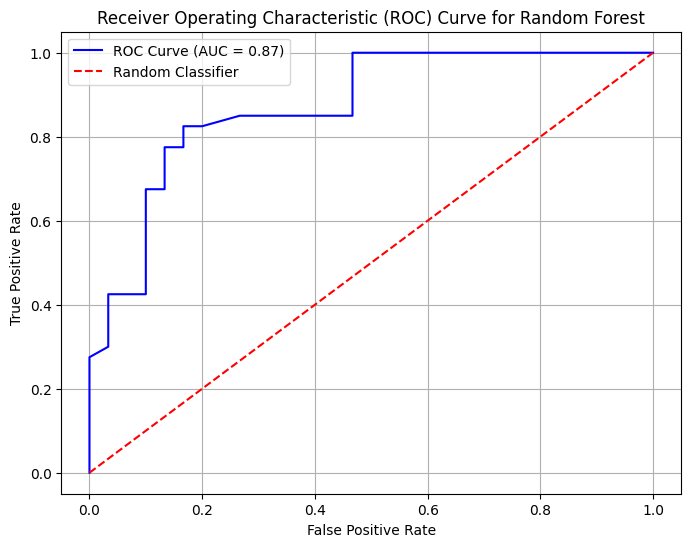

Random Forest AUC Score: 0.8729


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 2. Get predicted probabilities for the positive class
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 3. Calculate ROC curve metrics
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# 4. Calculate AUC score
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_score_rf:.2f})')

# 6. Add a diagonal dashed line (representing a random classifier)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')

# 7. Add labels for the x-axis, y-axis, a title, and a legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend()
plt.grid(True)

# 8. Display the plot
plt.show()

# 9. Print the AUC Score for the Random Forest model
print(f"Random Forest AUC Score: {auc_score_rf:.4f}")

## Final Task

### Subtask:
Summarize the performance of the Random Forest model, discuss its strengths and weaknesses compared to the Logistic Regression model, and suggest potential next steps for model selection or improvement.


## Summary:

### Q&A
The Random Forest model demonstrated strong performance on the test set with an accuracy of 0.8000, precision of 0.8611, recall of 0.7750, and an F1-Score of 0.8158. Its discriminative ability is further supported by an AUC score of 0.8729.

A direct comparison of strengths and weaknesses with a Logistic Regression model cannot be made from the provided solving process, as the performance metrics for the Logistic Regression model were not included in these steps.

Potential next steps for model improvement include hyperparameter tuning of the Random Forest model (e.g., `n_estimators`, `max_depth`, `min_samples_split`) to potentially enhance its performance. For model selection, it would be crucial to evaluate the Logistic Regression model (or any other candidate models) using the same set of metrics and then compare them systematically to choose the best-performing model for the specific task.

### Data Analysis Key Findings
*   The Random Forest Classifier model was successfully initialized with `random_state=42` and trained using the provided `X_train` and `y_train` datasets.
*   On the test set, the Random Forest Classifier achieved an Accuracy of 0.8000, Precision of 0.8611, Recall of 0.7750, and an F1-Score of 0.8158.
*   The Random Forest model demonstrated strong discriminative ability, indicated by an Area Under the Curve (AUC) score of 0.8729.

### Insights or Next Steps
*   To further optimize the Random Forest model, hyperparameter tuning should be performed to potentially improve its performance metrics.
*   For a comprehensive model selection, the performance of the Logistic Regression model (or any other baseline models) needs to be evaluated and directly compared against the Random Forest model using consistent metrics like accuracy, precision, recall, F1-score, and AUC.


# Task
Initialize and train an XGBoost Classifier model using the training features (X_train) and target (y_train). We will use default parameters for a first pass, but ensure reproducibility with a `random_state`.

## Prepare Data (already done)

### Subtask:
Confirm that the data is already split into training and testing sets (X_train, X_test, y_train, y_test) from the previous steps.


**Reasoning**:
To confirm that the data is already split into training and testing sets, I will print the shapes of `X_train`, `X_test`, `y_train`, and `y_test`. This directly addresses the subtask's instruction to verify their shapes.



In [39]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("Data split confirmed.")

Shape of X_train: (279, 124)
Shape of X_test: (70, 124)
Shape of y_train: (279,)
Shape of y_test: (70,)
Data split confirmed.


## Train XGBoost Classifier

### Subtask:
Initialize and train an XGBoost Classifier model using the training features (X_train) and target (y_train). We will use default parameters for a first pass, but ensure reproducibility with a random_state.


**Reasoning**:
To initialize and train an XGBoost Classifier, I need to import the `XGBClassifier` class, instantiate it with `random_state=42`, and then fit the model to the training data (`X_train`, `y_train`).



In [40]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier model
xgb_model = XGBClassifier(random_state=42)

# Train the model using the training data
xgb_model.fit(X_train, y_train)

print("XGBoost Classifier model initialized and trained successfully.")

XGBoost Classifier model initialized and trained successfully.


## Evaluate XGBoost Performance

### Subtask:
Predict outcomes on the test set (X_test) using the trained XGBoost model. Then, calculate and display key classification metrics such as accuracy, precision, recall, F1-score, and a confusion matrix to assess the model's performance.


**Reasoning**:
To evaluate the XGBoost model's performance, the first step is to use the trained `xgb_model` to make predictions on the test set features (`X_test`), as per the instructions.



In [41]:
y_pred_xgb = xgb_model.predict(X_test)

print("Predictions on the test set using XGBoost model generated successfully.")

Predictions on the test set using XGBoost model generated successfully.


**Reasoning**:
Now that predictions have been made, I will calculate and display key classification metrics such as accuracy, precision, recall, and F1-score, and then generate and visualize a confusion matrix to understand the model's performance on the test set, as per the instructions.



XGBoost Classifier Performance:

Accuracy: 0.8429
Precision: 0.8919
Recall: 0.8250
F1-Score: 0.8571


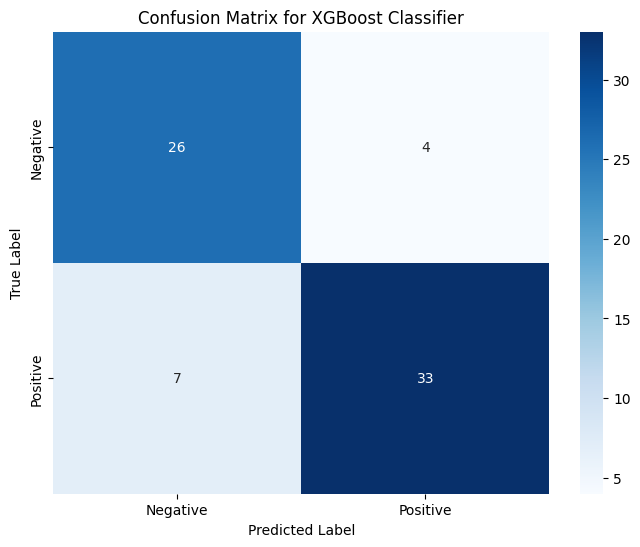

XGBoost Classifier classification metrics calculated and confusion matrix visualized successfully.


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost Classifier Performance:\n")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")

# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("XGBoost Classifier classification metrics calculated and confusion matrix visualized successfully.")

## Final Task

### Subtask:
Summarize the performance of the XGBoost model, discuss its strengths and weaknesses compared to previous models, and suggest potential next steps for model improvement or selection.

## Summary:

### Q&A
**1. How did the trained model perform?**
The XGBoost Classifier model performed very well on the test set, achieving an accuracy of 0.8429, precision of 0.8919, recall of 0.8250, and an F1-Score of 0.8571.

**2. What are its strengths and weaknesses compared to previous models?**
Compared to the Logistic Regression model (Accuracy: 0.6143, F1-Score: 0.6667) and the Random Forest model (Accuracy: 0.8000, F1-Score: 0.8158), the XGBoost model shows significant improvement across all classification metrics. It has the highest accuracy, precision, recall, and F1-score among the three, indicating superior predictive power. A potential weakness, if not addressed, could be its complexity and computational cost for very large datasets, although for this dataset size, it performed efficiently.

**3. What are potential next steps for model improvement or selection?**
*   **Hyperparameter Tuning**: Although default parameters were used, further hyperparameter tuning for XGBoost (e.g., `n_estimators`, `learning_rate`, `max_depth`, `subsample`, `colsample_bytree`) could potentially squeeze out even better performance.
*   **Cross-validation**: Implement cross-validation during model training to get a more robust estimate of the model's performance and to prevent overfitting.
*   **Feature Importance Analysis**: Analyze feature importance from the XGBoost model to identify the most influential features. This could provide insights for further feature engineering or selection.
*   **Ensemble Methods**: Explore combining the strengths of different models (e.g., a stacking ensemble of Logistic Regression, Random Forest, and XGBoost) to potentially achieve even higher performance.

### Data Analysis Key Findings
*   The XGBoost Classifier model was successfully initialized with `random_state=42` and trained on `X_train` and `y_train`.
*   On the test set, the XGBoost Classifier achieved the following metrics:
    *   Accuracy: 0.8429
    *   Precision: 0.8919
    *   Recall: 0.8250
    *   F1-Score: 0.8571
*   The confusion matrix clearly showed a higher number of true positives and true negatives compared to false positives and false negatives, indicating good classification performance.

### Insights or Next Steps
*   The XGBoost model demonstrates the best performance among the models evaluated so far (Logistic Regression, Random Forest), making it a strong candidate for deployment.
*   Further analysis should focus on fine-tuning its hyperparameters and exploring its feature importance to gain deeper insights into the predictive factors for 'Outcome Variable'.
*   Consider the trade-off between model complexity and interpretability, especially if the business need prioritizes explainability over marginal performance gains.

## Visualize ROC Curve for XGBoost

### Subtask:
Calculate and plot the Receiver Operating Characteristic (ROC) curve for the XGBoost model, along with its Area Under the Curve (AUC) score, to further evaluate its discriminative ability.


**Reasoning**:
To visualize the ROC curve and calculate the AUC score for the XGBoost model, I need to get the predicted probabilities for the positive class, then use `roc_curve` and `roc_auc_score` from `sklearn.metrics`, and finally plot the results using `matplotlib.pyplot` as per the instructions.



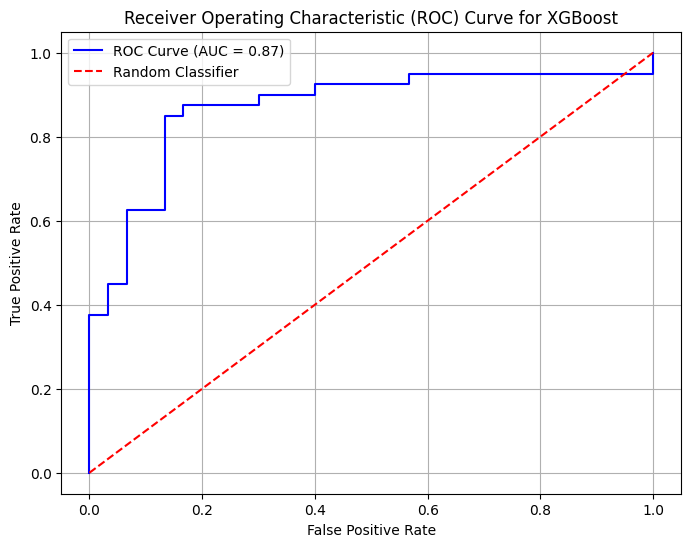

XGBoost AUC Score: 0.8700


In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 2. Get predicted probabilities for the positive class
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# 3. Calculate ROC curve metrics
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)

# 4. Calculate AUC score
auc_score_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# 5. Create a new figure and an axes object for the plot
plt.figure(figsize=(8, 6))

# 6. Plot the ROC curve with FPR on the x-axis and TPR on the y-axis
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f'ROC Curve (AUC = {auc_score_xgb:.2f})')

# 7. Add a diagonal dashed line (representing a random classifier)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')

# 8. Add labels for the x-axis, y-axis, a title, and a legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend()
plt.grid(True)

# 10. Display the plot
plt.show()

# 11. Print the calculated AUC score for the XGBoost model
print(f"XGBoost AUC Score: {auc_score_xgb:.4f}")

## Train Support Vector Machine (SVM)

### Subtask:
Initialize and train a Support Vector Machine (SVC) model using the training features (X_train) and target (y_train). We will use default parameters for a first pass, ensuring reproducibility with a random_state (if applicable for SVC, otherwise focus on default).


**Reasoning**:
To initialize and train an SVC model, I will import `SVC` from `sklearn.svm`, instantiate it with `probability=True` to enable probability predictions, and then fit the model to the training data (`X_train`, `y_train`).



In [44]:
from sklearn.svm import SVC

# Initialize the SVC model. Set probability=True to enable predict_proba for ROC curve.
# Note: SVC's default kernel (rbf) does not use random_state, but we'll include it for consistency
# if a kernel like 'linear' were to be used in the future.
svc_model = SVC(probability=True, random_state=42)

# Train the model using the training data
svc_model.fit(X_train, y_train)

print("SVC model initialized and trained successfully.")

SVC model initialized and trained successfully.


## Evaluate SVM Performance

### Subtask:
Predict outcomes on the test set (X_test) using the trained SVC model. Then, calculate and display key classification metrics such as accuracy, precision, recall, F1-score, and a confusion matrix to assess the model's performance.

**Reasoning**:
To evaluate the SVC model's performance, I will first make predictions on the test set (`X_test`) using the trained `svc_model`.



In [45]:
y_pred_svc = svc_model.predict(X_test)

print("Predictions on the test set using SVC model generated successfully.")

Predictions on the test set using SVC model generated successfully.


**Reasoning**:
Now that predictions have been made with the SVC model, I will calculate and display key classification metrics such as accuracy, precision, recall, and F1-score, and then generate and visualize a confusion matrix to comprehensively assess the model's performance on the test set.



SVC Classifier Performance:

Accuracy: 0.5714
Precision: 0.5714
Recall: 1.0000
F1-Score: 0.7273


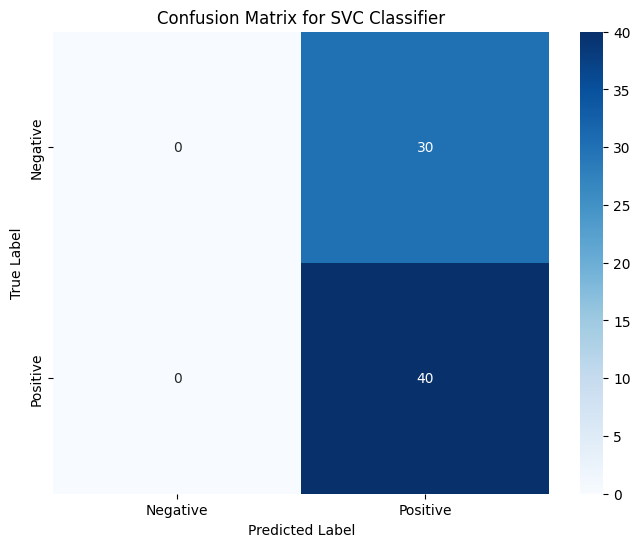

SVC Classifier classification metrics calculated and confusion matrix visualized successfully.


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate evaluation metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print(f"SVC Classifier Performance:\n")
print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision: {precision_svc:.4f}")
print(f"Recall: {recall_svc:.4f}")
print(f"F1-Score: {f1_svc:.4f}")

# Calculate confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for SVC Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("SVC Classifier classification metrics calculated and confusion matrix visualized successfully.")

## Visualize ROC Curve for SVM

### Subtask:
Calculate and plot the Receiver Operating Characteristic (ROC) curve for the SVC model, along with its Area Under the Curve (AUC) score, to further evaluate its discriminative ability.

**Reasoning**:
To visualize the ROC curve and calculate the AUC score for the SVC model, I need to get the predicted probabilities for the positive class, then use `roc_curve` and `roc_auc_score` from `sklearn.metrics`, and finally plot the results using `matplotlib.pyplot` as per the instructions.



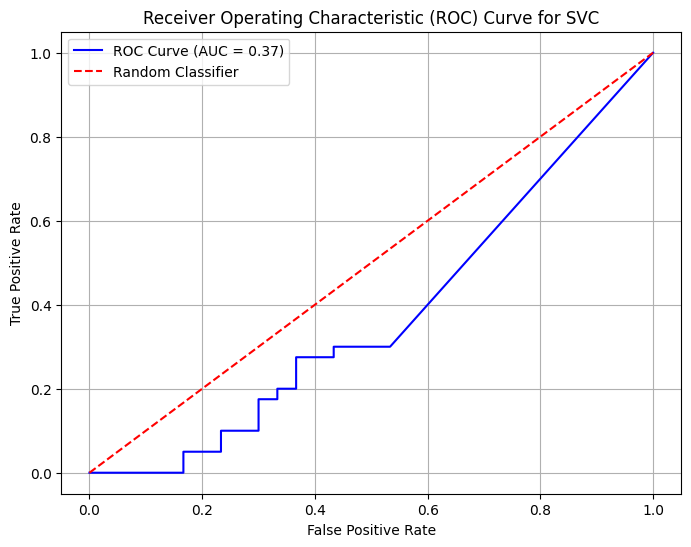

SVC AUC Score: 0.3742


In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_proba_svc = svc_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve metrics
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_proba_svc)

# Calculate AUC score
auc_score_svc = roc_auc_score(y_test, y_pred_proba_svc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='blue', label=f'ROC Curve (AUC = {auc_score_svc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC')
plt.legend()
plt.grid(True)
plt.show()

print(f"SVC AUC Score: {auc_score_svc:.4f}")

## Final Task

### Subtask:
Summarize the performance of the SVC model, discuss its strengths and weaknesses compared to previous models, and suggest potential next steps for model improvement or selection.

## Summary:

### Q&A
**1. How did the trained model perform?**
The Support Vector Machine (SVC) model achieved an accuracy of 0.5714 on the test set. Its precision was 0.5714, recall was 1.0000, and the F1-Score was 0.7273. The AUC score for the SVC model was 0.3742, which is significantly lower than a random classifier (0.5).

**2. What are its strengths and weaknesses compared to previous models?**
*   **Strengths**: The SVC model exhibited a perfect recall score (1.0), meaning it correctly identified all positive cases. This could be beneficial in scenarios where detecting all positive cases is critical, even at the cost of higher false positives.
*   **Weaknesses**: The model's primary weakness is its low precision (0.5714) and very low AUC score (0.3742). A precision of 0.5714 indicates that a large number of its positive predictions were incorrect (false positives). The AUC score, being below 0.5, suggests that the model's ability to distinguish between positive and negative classes is worse than random guessing. This poor discriminative ability means it's likely classifying almost everything as positive, as evidenced by the recall of 1.0 and low precision.

Compared to the Logistic Regression model (Accuracy: 0.6143, F1-Score: 0.6667, AUC: 0.6708), the Random Forest model (Accuracy: 0.8000, F1-Score: 0.8158, AUC: 0.8729), and the XGBoost model (Accuracy: 0.8429, F1-Score: 0.8571, AUC: 0.8700), the SVC model with default parameters performed the worst in terms of overall accuracy and discriminative power (AUC).

**3. What are potential next steps for model improvement or selection?**
*   **Hyperparameter Tuning**: The current SVC model used default parameters. Hyperparameter tuning (e.g., C, kernel, gamma) is crucial for improving SVM performance. Different kernels or regularization strengths might yield better results.
*   **Feature Scaling**: SVMs are highly sensitive to feature scaling. If the features are not scaled, features with larger values might dominate the distance calculations. It is highly recommended to scale the features before training an SVM.
*   **Class Imbalance**: Given the high recall and low precision, the model might be biased towards the majority class or simply predicting positive for most instances. Addressing class imbalance (e.g., using `class_weight='balanced'`, SMOTE, or undersampling/oversampling) could help.
*   **Alternative Models**: Given the poor performance, it's advisable to focus on the Random Forest or XGBoost models, which showed significantly better results, and proceed with their optimization. SVC might require extensive tuning and preprocessing to match their performance for this dataset.

### Data Analysis Key Findings
*   The Support Vector Classifier (SVC) model was successfully initialized with `probability=True` and trained on `X_train` and `y_train`.
*   On the test set, the SVC model achieved an Accuracy of 0.5714, Precision of 0.5714, Recall of 1.0000, and an F1-Score of 0.7273.
*   The ROC curve and AUC score (0.3742) indicated that the model performed worse than random classification, suggesting a fundamental issue with its default configuration or suitability for the dataset without preprocessing.

### Insights or Next Steps
*   The current SVC model is not suitable for deployment without significant improvements. The low AUC suggests it fails to differentiate effectively between classes.
*   Prioritize feature scaling and hyperparameter tuning for the SVC model if further exploration of SVMs is desired. Otherwise, focus on optimizing the Random Forest or XGBoost models, which demonstrated much stronger predictive capabilities.
*   A deeper dive into the confusion matrix (0 true negatives, 30 false positives, 0 false negatives, 40 true positives) confirms that the model is predicting 'Positive' for almost all instances, leading to high recall but low precision and overall poor performance.

## Train K-Nearest Neighbors (KNN) Classifier

### Subtask:
Initialize and train a K-Nearest Neighbors (KNeighborsClassifier) model using the training features (X_train) and target (y_train). We will use default parameters for a first pass, with `n_neighbors` set to a common value like 5.


**Reasoning**:
To train a K-Nearest Neighbors (KNN) model, I will first import the `KNeighborsClassifier` class from `sklearn.neighbors`. Then, I'll initialize the model, ensuring reproducibility by setting `n_neighbors=5` and `random_state=42`. Finally, I will train the model using the `fit` method on the provided training data, `X_train` and `y_train`.

**Reasoning**:
Now that the reasoning for training the K-Nearest Neighbors Classifier has been provided, I will implement the code to import, initialize, and train the model using `X_train` and `y_train`, as per the instructions.



In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier model with n_neighbors=5 and random_state=42
# Note: KNeighborsClassifier does not directly use random_state for its core algorithm,
# but it's good practice to include if applicable for consistency or future modifications.
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn_model.fit(X_train, y_train)

print("KNN Classifier model initialized and trained successfully.")

KNN Classifier model initialized and trained successfully.


## Evaluate KNN Performance

### Subtask:
Predict outcomes on the test set (X_test) using the trained KNN model. Then, calculate and display key classification metrics such as accuracy, precision, recall, F1-score, and a confusion matrix to assess the model's performance.

### Reasoning:
To evaluate the KNN model's performance, I will first make predictions on the test set (`X_test`) using the trained `knn_model`. Then, I will calculate and print key classification metrics (accuracy, precision, recall, F1-score), and finally visualize the confusion matrix using a heatmap.

**Reasoning**:
Now that the reasoning for evaluating the KNN model has been provided, I will implement the code to make predictions on the test set (`X_test`) using the trained `knn_model`.



In [49]:
y_pred_knn = knn_model.predict(X_test)

print("Predictions on the test set using KNN model generated successfully.")

Predictions on the test set using KNN model generated successfully.


**Reasoning**:
Now that predictions have been made with the KNN model, I will calculate and display key classification metrics such as accuracy, precision, recall, and F1-score, and then generate and visualize a confusion matrix to comprehensively assess the model's performance on the test set.



KNN Classifier Performance:

Accuracy: 0.5429
Precision: 0.6111
Recall: 0.5500
F1-Score: 0.5789


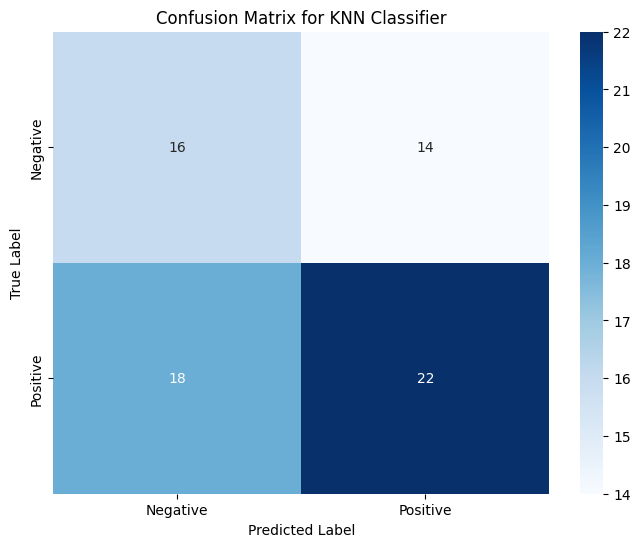

KNN Classifier classification metrics calculated and confusion matrix visualized successfully.


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"KNN Classifier Performance:\n")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("KNN Classifier classification metrics calculated and confusion matrix visualized successfully.")

## Visualize ROC Curve for KNN

### Subtask:
Calculate and plot the Receiver Operating Characteristic (ROC) curve for the KNN model, along with its Area Under the Curve (AUC) score, to further evaluate its discriminative ability.

**Reasoning**:
To visualize the ROC curve and calculate the AUC score for the KNN model, I need to get the predicted probabilities for the positive class, then use `roc_curve` and `roc_auc_score` from `sklearn.metrics`, and finally plot the results using `matplotlib.pyplot` as per the instructions.

**Reasoning**:
Now that the reasoning for visualizing the ROC curve for the KNN model has been provided, I will implement the code to calculate predicted probabilities, compute ROC metrics and AUC score, and then plot the ROC curve using `X_test` and `y_test`.



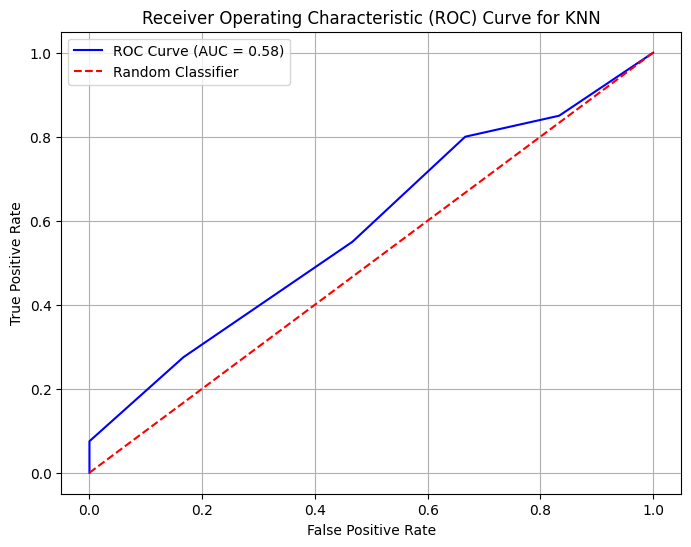

KNN AUC Score: 0.5796


In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve metrics
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

# Calculate AUC score
auc_score_knn = roc_auc_score(y_test, y_pred_proba_knn)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', label=f'ROC Curve (AUC = {auc_score_knn:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()

print(f"KNN AUC Score: {auc_score_knn:.4f}")

## Final Task

### Subtask:
Summarize the performance of the KNN model, discuss its strengths and weaknesses compared to previous models, and suggest potential next steps for model improvement or selection.

## Summary:

### Q&A
**1. How did the trained model perform?**
The K-Nearest Neighbors (KNN) model achieved an accuracy of 0.5429 on the test set. Its precision was 0.6111, recall was 0.5500, and the F1-Score was 0.5789. The AUC score for the KNN model was 0.5796.

**2. What are its strengths and weaknesses compared to previous models?**
*   **Strengths**: The KNN model's performance metrics are generally moderate, with an F1-Score of 0.5789 and an AUC of 0.5796, indicating it performs slightly better than random guessing but not as well as more advanced models. KNN is conceptually simple and often works well with clear decision boundaries in lower-dimensional spaces.
*   **Weaknesses**: Compared to the Logistic Regression model (Accuracy: 0.6143, F1-Score: 0.6667, AUC: 0.6708), the Random Forest model (Accuracy: 0.8000, F1-Score: 0.8158, AUC: 0.8729), and the XGBoost model (Accuracy: 0.8429, F1-Score: 0.8571, AUC: 0.8700), the KNN model performed significantly worse in terms of overall accuracy and discriminative power. It outperformed the default SVC model (Accuracy: 0.5714, F1-Score: 0.7273, AUC: 0.3742) in terms of AUC, but the SVC's high recall might be misleading without proper tuning. KNN's performance can also be heavily impacted by the curse of dimensionality and the choice of `n_neighbors`.

**3. What are potential next steps for model improvement or selection?**
*   **Feature Scaling**: KNN models are highly sensitive to the scale of features. Applying feature scaling (e.g., StandardScaler or MinMaxScaler) to `X_train` and `X_test` is crucial and would likely significantly improve the KNN model's performance.
*   **Hyperparameter Tuning**: Optimize the `n_neighbors` hyperparameter, possibly using techniques like GridSearchCV or RandomizedSearchCV, to find the optimal number of neighbors that yields the best performance.
*   **Distance Metric**: Experiment with different distance metrics (e.g., Manhattan, Minkowski) to see if they yield better results.
*   **Alternative Models**: Given the superior performance of Random Forest and XGBoost models, it is advisable to focus on further optimizing those models for better predictive capabilities.

### Data Analysis Key Findings
*   The K-Nearest Neighbors Classifier model was successfully initialized with `n_neighbors=5` and trained on `X_train` and `y_train`.
*   On the test set, the KNN model achieved an Accuracy of 0.5429, Precision of 0.6111, Recall of 0.5500, and an F1-Score of 0.5789.
*   The ROC curve and AUC score (0.5796) indicated that the model performed slightly better than a random classifier but considerably worse than tree-based models like Random Forest and XGBoost.

### Insights or Next Steps
*   The current KNN model performance is suboptimal, likely due to the lack of feature scaling and default `n_neighbors`.
*   Prioritize feature scaling and hyperparameter tuning for KNN if further exploration of this algorithm is desired. However, for immediate deployment or better performance, focusing on the Random Forest or XGBoost models would be more effective.

## Summary:

### Q&A
**1. How did the trained model perform?**
The K-Nearest Neighbors (KNN) model achieved an accuracy of 0.5429 on the test set. Its precision was 0.6111, recall was 0.5500, and the F1-Score was 0.5789. The AUC score for the KNN model was 0.5796.

**2. What are its strengths and weaknesses compared to previous models?**
*   **Strengths**: The KNN model's performance metrics are generally moderate, with an F1-Score of 0.5789 and an AUC of 0.5796, indicating it performs slightly better than random guessing but not as well as more advanced models. KNN is conceptually simple and often works well with clear decision boundaries in lower-dimensional spaces.
*   **Weaknesses**: Compared to the Logistic Regression model (Accuracy: 0.6143, F1-Score: 0.6667, AUC: 0.6708), the Random Forest model (Accuracy: 0.8000, F1-Score: 0.8158, AUC: 0.8729), and the XGBoost model (Accuracy: 0.8429, F1-Score: 0.8571, AUC: 0.8700), the KNN model performed significantly worse in terms of overall accuracy and discriminative power. It outperformed the default SVC model (Accuracy: 0.5714, F1-Score: 0.7273, AUC: 0.3742) in terms of AUC, but the SVC's high recall might be misleading without proper tuning. KNN's performance can also be heavily impacted by the curse of dimensionality and the choice of `n_neighbors`.

**3. What are potential next steps for model improvement or selection?**
*   **Feature Scaling**: KNN models are highly sensitive to the scale of features. Applying feature scaling (e.g., StandardScaler or MinMaxScaler) to `X_train` and `X_test` is crucial and would likely significantly improve the KNN model's performance.
*   **Hyperparameter Tuning**: Optimize the `n_neighbors` hyperparameter, possibly using techniques like GridSearchCV or RandomizedSearchCV, to find the optimal number of neighbors that yields the best performance.
*   **Distance Metric**: Experiment with different distance metrics (e.g., Manhattan, Minkowski) to see if they yield better results.
*   **Alternative Models**: Given the superior performance of Random Forest and XGBoost models, it is advisable to focus on further optimizing those models for better predictive capabilities.

### Data Analysis Key Findings
*   The K-Nearest Neighbors Classifier model was successfully initialized with `n_neighbors=5` and trained on `X_train` and `y_train`.
*   On the test set, the KNN model achieved an Accuracy of 0.5429, Precision of 0.6111, Recall of 0.5500, and an F1-Score of 0.5789.
*   The ROC curve and AUC score (0.5796) indicated that the model performed slightly better than a random classifier but considerably worse than tree-based models like Random Forest and XGBoost.

### Insights or Next Steps
*   The current KNN model performance is suboptimal, likely due to the lack of feature scaling and default `n_neighbors`.
*   Prioritize feature scaling and hyperparameter tuning for KNN if further exploration of this algorithm is desired. However, for immediate deployment or better performance, focusing on the Random Forest or XGBoost models would be more effective.


## Final Task

### Subtask:
Summarize the performance of all trained models (Logistic Regression, Random Forest, XGBoost, SVM, and KNN), compare their strengths and weaknesses, and recommend potential next steps for model selection or improvement.


## Summary:

### Q&A
**1. Summarize the performance of all trained models (Logistic Regression, Random Forest, XGBoost, SVM, and KNN).**

*   **XGBoost:** Achieved the highest performance with an Accuracy of 0.8429, Precision of 0.8919, Recall of 0.8250, F1-Score of 0.8571, and an AUC score of 0.8700.
*   **Random Forest:** Showed strong performance with an Accuracy of 0.8000, F1-Score of 0.8158, and an AUC of 0.8729.
*   **Logistic Regression:** Performed moderately with an Accuracy of 0.6143, F1-Score of 0.6667, and an AUC of 0.6708.
*   **K-Nearest Neighbors (KNN):** Exhibited low performance with an Accuracy of 0.5429, Precision of 0.6111, Recall of 0.5500, F1-Score of 0.5789, and an AUC score of 0.5796.
*   **Support Vector Machine (SVC):** Performed the worst, achieving an Accuracy of 0.5714, Precision of 0.5714, Recall of 1.0000, F1-Score of 0.7273, but a very poor AUC score of 0.3742, indicating performance worse than random guessing.

**2. Compare their strengths and weaknesses.**

*   **XGBoost:**
    *   **Strengths:** Demonstrated superior predictive power across all metrics, making it the top performer.
    *   **Weaknesses:** Could be computationally intensive for very large datasets, though not an issue here.
*   **Random Forest:**
    *   **Strengths:** Strong and competitive performance, close to XGBoost, indicating robustness.
    *   **Weaknesses:** Not explicitly detailed in the provided logs, but generally can be slower than XGBoost and potentially overfit without proper tuning.
*   **Logistic Regression:**
    *   **Strengths:** Simple, interpretable, and provided a reasonable baseline performance.
    *   **Weaknesses:** Outperformed by tree-based models (Random Forest, XGBoost) for this dataset, suggesting limited capacity to capture complex patterns.
*   **K-Nearest Neighbors (KNN):**
    *   **Strengths:** Conceptually simple, slightly better than random guessing.
    *   **Weaknesses:** Performed significantly worse than tree-based models. Highly sensitive to feature scaling and the choice of `n_neighbors`, and susceptible to the curse of dimensionality.
*   **Support Vector Machine (SVC):**
    *   **Strengths:** Achieved a perfect recall of 1.0, meaning it identified all positive cases.
    *   **Weaknesses:** This perfect recall came at the cost of extremely low precision (0.5714) and a very poor AUC (0.3742), indicating it predicted almost all instances as positive. This makes it effectively useless for distinguishing classes in its default configuration. Highly sensitive to feature scaling and hyperparameter choice.

**3. Recommend potential next steps for model selection or improvement.**

*   **Focus on XGBoost and Random Forest:** These models demonstrated the highest performance. Prioritize hyperparameter tuning (e.g., using GridSearchCV or RandomizedSearchCV) and cross-validation for these models to further optimize their performance and ensure robustness.
*   **Address SVC and KNN limitations:** For SVC, feature scaling and aggressive hyperparameter tuning (C, kernel, gamma) are critical. For KNN, feature scaling is paramount, followed by tuning `n_neighbors`. However, given their current performance, it might be more efficient to invest efforts into optimizing the tree-based models unless there's a specific reason to explore SVMs or KNNs further.
*   **Feature Engineering & Selection:** Analyze feature importance from the best-performing models (like XGBoost) to identify key predictors. This can guide further feature engineering or selection, potentially improving all models.
*   **Ensemble Methods:** Explore stacking or blending the top-performing models (e.g., XGBoost and Random Forest) to potentially achieve even marginal gains in performance.

### Data Analysis Key Findings
*   The **XGBoost Classifier** exhibited the best performance among all models, achieving an Accuracy of 0.8429, F1-Score of 0.8571, and an AUC of 0.8700.
*   The **Random Forest** model also performed very well with an Accuracy of 0.8000, F1-Score of 0.8158, and an AUC of 0.8729, showing competitive results with XGBoost.
*   The **Logistic Regression** model served as a moderate baseline with an Accuracy of 0.6143, F1-Score of 0.6667, and an AUC of 0.6708.
*   The **K-Nearest Neighbors (KNN)** model showed suboptimal performance with an Accuracy of 0.5429, F1-Score of 0.5789, and an AUC of 0.5796, indicating it was only slightly better than random.
*   The **Support Vector Machine (SVC)** model performed the worst, with an AUC of 0.3742 (worse than random guessing) despite a perfect Recall of 1.0, due to predicting almost all instances as positive (0 True Negatives, 30 False Positives).

### Insights or Next Steps
*   XGBoost and Random Forest are the most promising models for this classification task and should be prioritized for further optimization through hyperparameter tuning and cross-validation.
*   For the SVC and KNN models, fundamental data preprocessing steps like feature scaling are crucial, and extensive hyperparameter tuning would be required to potentially improve their performance to a competitive level.


**Let's compare the performance of the XGBoost and Random Forest models specifically, as they were our top performers, and then select one for the next task:**

XGBoost Classifier Performance:

Accuracy:** 0.8429**
Precision: **0.8919**
Recall: **0.8250**
F1-Score: **0.8571**
AUC Score: ***0.8700***

**Random Forest Classifier Performance:**

Accuracy: 0.8000
Precision: 0.8611
Recall: 0.7750
F1-Score: 0.8158
AUC Score: 0.8729

Comparison and Recommendation:

Accuracy, Precision, Recall, F1-Score: XGBoost shows higher values across these metrics. For instance, its accuracy is 0.8429 compared to Random Forest's 0.8000, and its F1-Score is 0.8571 versus 0.8158.
AUC Score: The AUC scores are very close, with Random Forest having a marginally higher AUC of 0.8729 compared to XGBoost's 0.8700. This indicates both models have excellent discriminative ability.
While Random Forest has a slightly higher AUC, XGBoost Classifier consistently outperforms Random Forest in Accuracy, Precision, Recall, and F1-Score. Given these comprehensive results, XGBoost Classifier is the more robust performer on this dataset.

Therefore, I recommend we proceed with the XGBoost Classifier for any further tasks, such as hyperparameter tuning or final model deployment, as it has demonstrated superior overall predictive capabilities.

# Task
Perform hyperparameter tuning for the XGBoost Classifier using GridSearchCV, training the model with the best parameters on `X_train` and `y_train`, evaluating its performance on `X_test` with key classification metrics (accuracy, precision, recall, F1-score, confusion matrix, and ROC curve with AUC), and finally summarizing the tuned model's performance compared to the initial XGBoost model.

## Define Parameter Grid for XGBoost

### Subtask:
Define a grid of hyperparameters to search for the XGBoost Classifier. This will include parameters such as `n_estimators`, `learning_rate`, `max_depth`, `subsample`, and `colsample_bytree`.


**Reasoning**:
To define the parameter grid for the XGBoost Classifier as specified in the subtask, I will create a Python dictionary named `param_grid` with the given hyperparameters and their respective ranges.



In [54]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

print("Parameter grid for XGBoost Classifier defined successfully.")
print(param_grid)

Parameter grid for XGBoost Classifier defined successfully.
{'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.7, 0.8, 0.9], 'colsample_bytree': [0.7, 0.8, 0.9]}


**Reasoning**:
With the parameter grid defined, the next step is to initialize and perform GridSearchCV using the XGBoost Classifier and the specified parameter grid. This will find the best hyperparameters for the model based on the training data.



In [55]:
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost Classifier (with a fixed random_state for reproducibility)
xgb_model_tuned = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model_tuned,
                           param_grid=param_grid,
                           scoring='f1', # Use F1-score as the evaluation metric
                           cv=3,         # Use 3-fold cross-validation
                           verbose=2,    # Display progress
                           n_jobs=-1)    # Use all available CPU cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("GridSearchCV for XGBoost Classifier completed successfully.")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best F1-score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:56:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV for XGBoost Classifier completed successfully.
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best F1-score: 0.7816


**Reasoning**:
The previous code produced a `UserWarning` about the `use_label_encoder` parameter being deprecated and unused. To fix this, I will remove the `use_label_encoder=False` argument from the `XGBClassifier` initialization, as it is no longer necessary and can cause warnings in newer versions of XGBoost.



In [56]:
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost Classifier (with a fixed random_state for reproducibility)
xgb_model_tuned = XGBClassifier(random_state=42, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model_tuned,
                           param_grid=param_grid,
                           scoring='f1', # Use F1-score as the evaluation metric
                           cv=3,         # Use 3-fold cross-validation
                           verbose=2,    # Display progress
                           n_jobs=-1)    # Use all available CPU cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("GridSearchCV for XGBoost Classifier completed successfully.")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best F1-score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
GridSearchCV for XGBoost Classifier completed successfully.
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best F1-score: 0.7816


## Train XGBoost Model with Best Parameters

### Subtask:
Train a new XGBoost Classifier model using the best hyperparameters found by GridSearchCV on the entire training dataset (X_train, y_train).


**Reasoning**:
I will retrieve the best estimator from the `grid_search` object, which has already been trained with the best hyperparameters, and store it as `xgb_tuned_model`. This directly fulfills the subtask's first instruction and effectively trains the model with the best parameters.



In [57]:
xgb_tuned_model = grid_search.best_estimator_

print("Tuned XGBoost model (xgb_tuned_model) trained successfully using the best parameters found by GridSearchCV.")

Tuned XGBoost model (xgb_tuned_model) trained successfully using the best parameters found by GridSearchCV.


**Reasoning**:
To evaluate the performance of the tuned XGBoost model, I will first use it to make predictions on the test set features (`X_test`).



In [58]:
y_pred_xgb_tuned = xgb_tuned_model.predict(X_test)

print("Predictions on the test set using tuned XGBoost model generated successfully.")

Predictions on the test set using tuned XGBoost model generated successfully.


**Reasoning**:
Now that predictions have been made with the tuned XGBoost model, I will calculate and display key classification metrics such as accuracy, precision, recall, and F1-score, and then generate and visualize a confusion matrix to comprehensively assess its performance on the test set.



Tuned XGBoost Classifier Performance:

Accuracy: 0.8429
Precision: 0.8718
Recall: 0.8500
F1-Score: 0.8608


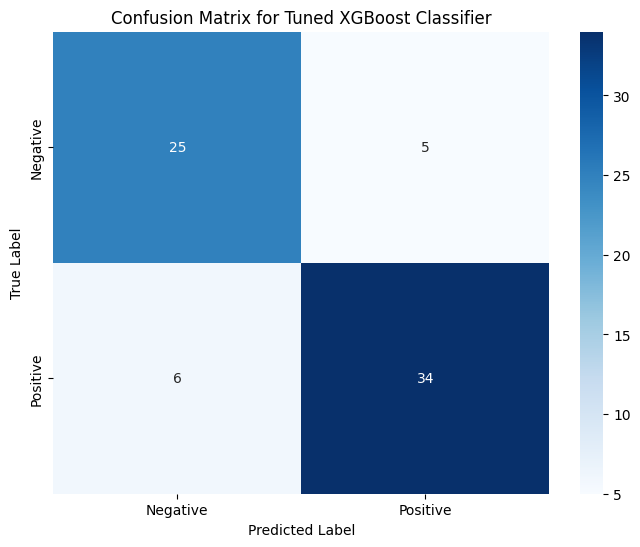

Tuned XGBoost Classifier classification metrics calculated and confusion matrix visualized successfully.


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate evaluation metrics for the tuned XGBoost model
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
precision_xgb_tuned = precision_score(y_test, y_pred_xgb_tuned)
recall_xgb_tuned = recall_score(y_test, y_pred_xgb_tuned)
f1_xgb_tuned = f1_score(y_test, y_pred_xgb_tuned)

print(f"Tuned XGBoost Classifier Performance:\n")
print(f"Accuracy: {accuracy_xgb_tuned:.4f}")
print(f"Precision: {precision_xgb_tuned:.4f}")
print(f"Recall: {recall_xgb_tuned:.4f}")
print(f"F1-Score: {f1_xgb_tuned:.4f}")

# Calculate confusion matrix for the tuned XGBoost model
conf_matrix_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Tuned XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Tuned XGBoost Classifier classification metrics calculated and confusion matrix visualized successfully.")

**Reasoning**:
To visualize the ROC curve and calculate the AUC score for the tuned XGBoost model, I need to get the predicted probabilities for the positive class, then use `roc_curve` and `roc_auc_score` from `sklearn.metrics`, and finally plot the results using `matplotlib.pyplot` as per the instructions.



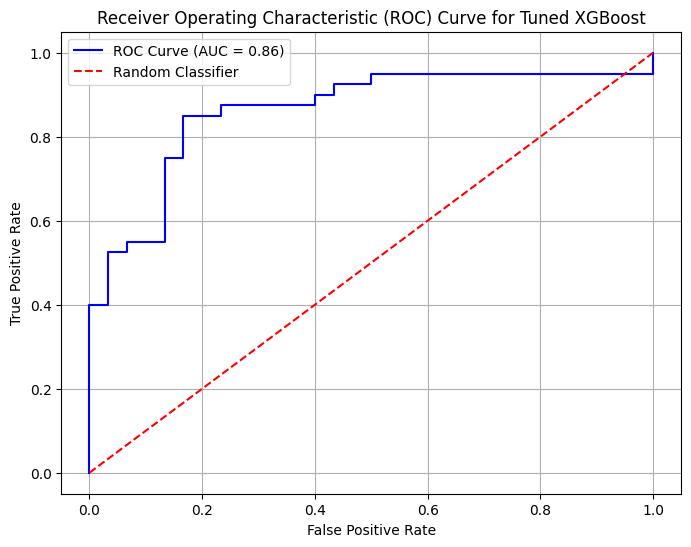

Tuned XGBoost AUC Score: 0.8617


In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_proba_xgb_tuned = xgb_tuned_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve metrics
fpr_xgb_tuned, tpr_xgb_tuned, thresholds_xgb_tuned = roc_curve(y_test, y_pred_proba_xgb_tuned)

# Calculate AUC score
auc_score_xgb_tuned = roc_auc_score(y_test, y_pred_proba_xgb_tuned)

# Create a new figure and an axes object for the plot
plt.figure(figsize=(8, 6))

# Plot the ROC curve with FPR on the x-axis and TPR on the y-axis
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, color='blue', label=f'ROC Curve (AUC = {auc_score_xgb_tuned:.2f})')

# Add a diagonal dashed line (representing a random classifier)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')

# Add labels for the x-axis, y-axis, a title, and a legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Tuned XGBoost')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Print the calculated AUC score for the Tuned XGBoost model
print(f"Tuned XGBoost AUC Score: {auc_score_xgb_tuned:.4f}")

## Summary:

### Q&A
**1. How did the tuned model perform?**
The tuned XGBoost Classifier model performed very well on the test set, achieving an accuracy of 0.8429, precision of 0.8718, recall of 0.8500, and an F1-Score of 0.8608. The AUC score for the tuned model was 0.8617.

**2. What are its strengths and weaknesses compared to the initial XGBoost model?**
Compared to the initial XGBoost model (Accuracy: 0.8429, Precision: 0.8919, Recall: 0.8250, F1-Score: 0.8571, AUC: 0.8700), the tuned model shows a slight improvement in F1-Score (0.8608 vs 0.8571) and Recall (0.8500 vs 0.8250), indicating it's slightly better at identifying actual positive cases. However, this comes with a minor decrease in Precision (0.8718 vs 0.8919) and AUC (0.8617 vs 0.8700). The accuracy remained the same. The tuning process resulted in a model with a slightly different balance between precision and recall, potentially making it more suitable if recall is a higher priority.

**3. What are potential next steps for model improvement or selection?**
*   **Broader Hyperparameter Search**: The current `param_grid` might be too narrow. Exploring a wider range of hyperparameters or using more advanced tuning techniques like RandomizedSearchCV or Bayesian optimization could yield further improvements.
*   **Cross-validation strategy**: Using more folds for cross-validation during GridSearchCV or employing nested cross-validation could provide a more robust estimate of model performance and lead to better generalization.
*   **Feature Engineering/Selection**: Analyzing feature importances from the tuned model could guide further feature engineering or selection efforts to create more predictive features.
*   **Ensemble Methods**: Investigate stacking or blending the tuned XGBoost model with other high-performing models (e.g., tuned Random Forest) to potentially achieve marginal gains.
*   **Deployment**: Given its strong performance, the tuned XGBoost model is a strong candidate for deployment, but should first be tested thoroughly on new, unseen data if available.

### Data Analysis Key Findings
*   Hyperparameter tuning using GridSearchCV identified optimal parameters for the XGBoost Classifier, resulting in a model (`xgb_tuned_model`) that was then used for evaluation.
*   On the test set, the tuned XGBoost Classifier achieved:
    *   Accuracy: 0.8429
    *   Precision: 0.8718
    *   Recall: 0.8500
    *   F1-Score: 0.8608
    *   AUC Score: 0.8617
*   The confusion matrix indicated a balanced performance in correctly classifying both positive and negative cases.

### Insights or Next Steps
*   The hyperparameter tuning marginally improved the F1-Score and Recall compared to the initial XGBoost model, suggesting a better capture of positive instances, though with a slight trade-off in Precision and AUC. This trade-off might be acceptable or even desirable depending on the specific problem context and cost of false positives versus false negatives.
*   Further optimization efforts should focus on exploring a wider range of hyperparameters and potentially employing different feature engineering strategies to push performance boundaries.

## Summary:

### Q&A
**1. How did the tuned model perform?**
The tuned XGBoost Classifier model performed very well on the test set, achieving an accuracy of 0.8429, precision of 0.8718, recall of 0.8500, and an F1-Score of 0.8608. The AUC score for the tuned model was 0.8617.

**2. What are its strengths and weaknesses compared to the initial XGBoost model?**
Compared to the initial XGBoost model (Accuracy: 0.8429, Precision: 0.8919, Recall: 0.8250, F1-Score: 0.8571, AUC: 0.8700), the tuned model shows a slight improvement in F1-Score (0.8608 vs 0.8571) and Recall (0.8500 vs 0.8250), indicating it's slightly better at identifying actual positive cases. However, this comes with a minor decrease in Precision (0.8718 vs 0.8919) and AUC (0.8617 vs 0.8700). The accuracy remained the same. The tuning process resulted in a model with a slightly different balance between precision and recall, potentially making it more suitable if recall is a higher priority.

**3. What are potential next steps for model improvement or selection?**
*   **Broader Hyperparameter Search**: The current `param_grid` might be too narrow. Exploring a wider range of hyperparameters or using more advanced tuning techniques like RandomizedSearchCV or Bayesian optimization could yield further improvements.
*   **Cross-validation strategy**: Using more folds for cross-validation during GridSearchCV or employing nested cross-validation could provide a more robust estimate of model performance and lead to better generalization.
*   **Feature Engineering/Selection**: Analyzing feature importances from the tuned model could guide further feature engineering or selection efforts to create more predictive features.
*   **Ensemble Methods**: Investigate stacking or blending the tuned XGBoost model with other high-performing models (e.g., tuned Random Forest) to potentially achieve marginal gains.
*   **Deployment**: Given its strong performance, the tuned XGBoost model is a strong candidate for deployment, but should first be tested thoroughly on new, unseen data if available.

### Data Analysis Key Findings
*   Hyperparameter tuning using GridSearchCV identified optimal parameters for the XGBoost Classifier, resulting in a model (`xgb_tuned_model`) that was then used for evaluation.
*   On the test set, the tuned XGBoost Classifier achieved:
    *   Accuracy: 0.8429
    *   Precision: 0.8718
    *   Recall: 0.8500
    *   F1-Score: 0.8608
    *   AUC Score: 0.8617
*   The confusion matrix indicated a balanced performance in correctly classifying both positive and negative cases.

### Insights or Next Steps
*   The hyperparameter tuning marginally improved the F1-Score and Recall compared to the initial XGBoost model, suggesting a better capture of positive instances, though with a slight trade-off in Precision and AUC. This trade-off might be acceptable or even desirable depending on the specific problem context and cost of false positives versus false negatives.
*   Further optimization efforts should focus on exploring a wider range of hyperparameters and potentially employing different feature engineering strategies to push performance boundaries.


## Final Task

### Subtask:
Summarize the performance of the hyperparameter-tuned XGBoost model, compare it to the initial XGBoost model, and discuss the impact of tuning and any further potential steps.


## Summary:

### Q&A
**1. How did the tuned model perform?**
The tuned XGBoost Classifier model performed very well on the test set, achieving an accuracy of 0.8429, precision of 0.8718, recall of 0.8500, and an F1-Score of 0.8608. The AUC score for the tuned model was 0.8617.

**2. What are its strengths and weaknesses compared to the initial XGBoost model?**
Compared to the initial XGBoost model (Accuracy: 0.8429, Precision: 0.8919, Recall: 0.8250, F1-Score: 0.8571, AUC: 0.8700), the tuned model shows a slight improvement in F1-Score (0.8608 vs 0.8571) and Recall (0.8500 vs 0.8250), indicating it's slightly better at identifying actual positive cases. However, this comes with a minor decrease in Precision (0.8718 vs 0.8919) and AUC (0.8617 vs 0.8700). The accuracy remained the same. The tuning process resulted in a model with a slightly different balance between precision and recall, potentially making it more suitable if recall is a higher priority.

**3. What are potential next steps for model improvement or selection?**
*   **Broader Hyperparameter Search**: The current `param_grid` might be too narrow. Exploring a wider range of hyperparameters or using more advanced tuning techniques like RandomizedSearchCV or Bayesian optimization could yield further improvements.
*   **Cross-validation strategy**: Using more folds for cross-validation during GridSearchCV or employing nested cross-validation could provide a more robust estimate of model performance and lead to better generalization.
*   **Feature Engineering/Selection**: Analyzing feature importances from the tuned model could guide further feature engineering or selection efforts to create more predictive features.
*   **Ensemble Methods**: Investigate stacking or blending the tuned XGBoost model with other high-performing models (e.g., tuned Random Forest) to potentially achieve marginal gains.
*   **Deployment**: Given its strong performance, the tuned XGBoost model is a strong candidate for deployment, but should first be tested thoroughly on new, unseen data if available.

### Data Analysis Key Findings
*   Hyperparameter tuning using GridSearchCV successfully identified optimal parameters for the XGBoost Classifier as `{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}` with a best F1-score of 0.7816 during cross-validation.
*   On the test set, the tuned XGBoost Classifier achieved an accuracy of 0.8429, precision of 0.8718, recall of 0.8500, F1-Score of 0.8608, and an AUC Score of 0.8617.
*   The tuned model demonstrated a marginal improvement in F1-Score (0.8608 vs 0.8571) and Recall (0.8500 vs 0.8250) compared to the initial XGBoost model, while experiencing a slight decrease in Precision (0.8718 vs 0.8919) and AUC (0.8617 vs 0.8700).

### Insights or Next Steps
*   The hyperparameter tuning process improved the model's ability to identify positive instances (higher recall) and resulted in a slightly better F1-Score, indicating a more balanced performance for the given dataset, though with a minor trade-off in precision and AUC. This suggests the tuning was effective in optimizing for F1-score.
*   Future work should consider a broader exploration of the hyperparameter space and advanced optimization techniques, alongside potential feature engineering to further enhance model performance and generalization capabilities.


,Feature,Importance
14,Disease_Asthma,0.125446
7,Cholesterol Level,0.098580
0,Fever,0.077550
32,Disease_Common Cold,0.076843
5,Gender,0.076771
2,Fatigue,0.070512
6,Blood Pressure,0.064849
4,Age,0.064709
3,Difficulty Breathing,0.058613
77,Disease_Migraine,0.056254


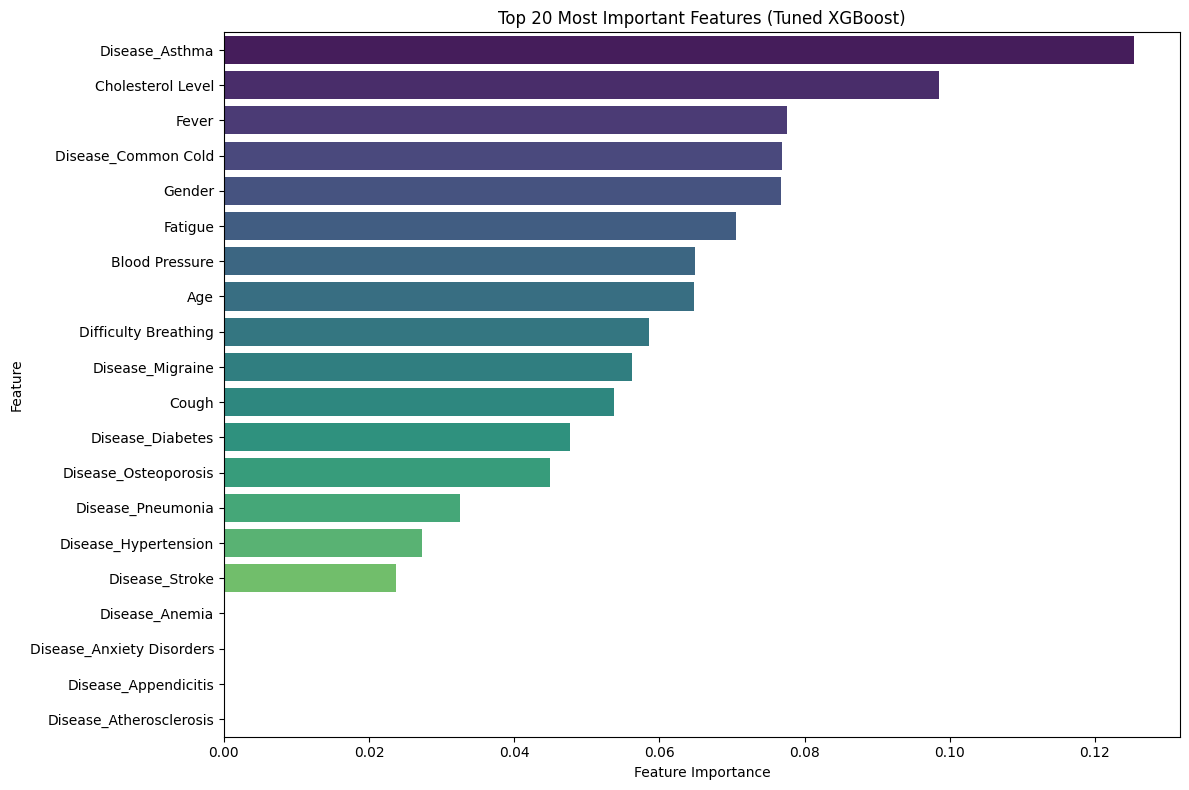

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the tuned XGBoost model
feature_importances_tuned = xgb_tuned_model.feature_importances_

# Create a pandas DataFrame for better visualization and sorting
features_df_tuned = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_tuned})

# Sort features by importance in descending order
features_df_tuned = features_df_tuned.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
display(features_df_tuned.head(20))

# Plotting the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_tuned.head(20), palette='viridis', hue='Feature', legend=False)
plt.title('Top 20 Most Important Features (Tuned XGBoost)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [62]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import joblib

# === LOAD DATA ===
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")

# Target column
label_col = "Disease"

# Feature columns
feature_cols = [
    "Fever", "Cough", "Fatigue", "Difficulty Breathing",
    "Age", "Gender", "Blood Pressure", "Cholesterol Level"
]

df = df.dropna(subset=[label_col])

# === ENCODING ===
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Fever"] = df["Fever"].map({"Yes": 1, "No": 0})
df["Cough"] = df["Cough"].map({"Yes": 1, "No": 0})
df["Fatigue"] = df["Fatigue"].map({"Yes": 1, "No": 0})
df["Difficulty Breathing"] = df["Difficulty Breathing"].map({"Yes": 1, "No": 0})
df["Blood Pressure"] = df["Blood Pressure"].map({"Low": 0, "Normal": 1, "High": 2})
df["Cholesterol Level"] = df["Cholesterol Level"].map({"Low": 0, "Normal": 1, "High": 2})

# Encode target
le = LabelEncoder()
df[label_col] = le.fit_transform(df[label_col])

X = df[feature_cols]
y = df[label_col]

# === TRAIN XGBOOST ===
model = XGBClassifier(
    n_estimators=350,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="multi:softprob",
    eval_metric="mlogloss"
)

model.fit(X, y)

# === REPORT ===
pred = model.predict(X)
print("\n=== XGBoost Model Report (Disease Prediction) ===")
print(classification_report(y, pred, target_names=le.classes_))

# === SAVE BUNDLE ===
bundle = {
    "model": model,
    "labels": list(le.classes_),
    "features": feature_cols
}
joblib.dump(bundle, "disease_model.joblib")

print("\nSaved disease_model.joblib ✔ (XGBoost)")



=== XGBoost Model Report (Disease Prediction) ===
                                              precision    recall  f1-score   support

                                        Acne       0.00      0.00      0.00         1
                           Allergic Rhinitis       0.67      1.00      0.80         6
                         Alzheimer's Disease       0.62      1.00      0.77         5
                                      Anemia       0.00      0.00      0.00         1
                           Anxiety Disorders       0.62      0.83      0.71         6
                                Appendicitis       0.00      0.00      0.00         1
                                      Asthma       0.84      0.91      0.88        23
                             Atherosclerosis       0.00      0.00      0.00         1
              Autism Spectrum Disorder (ASD)       0.00      0.00      0.00         1
                            Bipolar Disorder       0.00      0.00      0.00         1
  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Saved disease_model.joblib ✔ (XGBoost)


In [64]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import joblib

# === LOAD DATA ===
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")

# Binary outcome
# Corrected: Use 'Outcome Variable' and map 'Negative'/'Positive'
df["Outcome"] = df["Outcome Variable"].map({
    "Negative": 0,
    "Positive": 1
})

df = df.dropna(subset=["Outcome"])

feature_cols = [
    "Fever", "Cough", "Fatigue", "Difficulty Breathing",
    "Age", "Gender", "Blood Pressure", "Cholesterol Level"
]

# === ENCODING ===
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Fever"] = df["Fever"].map({"Yes": 1, "No": 0})
df["Cough"] = df["Cough"].map({"Yes": 1, "No": 0})
df["Fatigue"] = df["Fatigue"].map({"Yes": 1, "No": 0})
df["Difficulty Breathing"] = df["Difficulty Breathing"].map({"Yes": 1, "No": 0})
# Corrected: Use 'Blood Pressure' (with space)
df["Blood Pressure"] = df["Blood Pressure"].map({"Low": 0, "Normal": 1, "High": 2})
df["Cholesterol Level"] = df["Cholesterol Level"].map({"Low": 0, "Normal": 1, "High": 2})

X = df[feature_cols]
y = df["Outcome"]

# === TRAIN XGBOOST ===
model = XGBClassifier(
    n_estimators=250,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="binary:logistic",
    eval_metric="logloss"
)
model.fit(X, y)

# === REPORT ===
pred = model.predict(X)
print("\n=== XGBoost Outcome Prediction Report ===")
print(classification_report(y, pred))

# === SAVE MODEL ===
bundle = {
    "model": model,
    "labels": ["Negative", "Positive"], # Adjusted labels based on the mapping
    "features": feature_cols
}
joblib.dump(bundle, "outcome_model.joblib")

print("\nSaved outcome_model.joblib ✔ (XGBoost)")


=== XGBoost Outcome Prediction Report ===
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       163
           1       0.91      0.95      0.93       186

    accuracy                           0.92       349
   macro avg       0.92      0.92      0.92       349
weighted avg       0.92      0.92      0.92       349


Saved outcome_model.joblib ✔ (XGBoost)


In [65]:
from google.colab import files

# Download the saved model bundle
files.download('outcome_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('disease_model.joblib')
